# Credit Card Fraud Detection Capstone Project

## Problem Statement: 
Fraudulent activities have increased severalfold, with around 52,304 cases of credit/debit card fraud reported in FY'19 alone. Due to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time in order to help consumers as well as banks, who are losing their credit worth each day.
Every fraudulent credit card transaction that occur is a direct financial loss to the bank as the bank is responsible for the fraud transactions as well it also affects the overall customer satisfaction adversely.    
**The aim of this project is to identify and predict fraudulent credit card transactions using machine learning models.** 


## Data Understanding :

### Data Source: https://www.kaggle.com/mlg-ulb/creditcardata_frameraud

The data set that you will be working on during this project was obtained from Kaggle. It contains thousands of individual transactions that took place over a course of two days and their respective labels.

As you saw, the data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for just 0.172% of the total transactions. The data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in others.

The distribution plots of the variables were Gaussian, which might indicate the effects of transformations that had already occurred on the data set. 

In [1]:
# Importing machine learning and statistics libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

# Importing classifiers:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Importing necessary libraries:

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Installing scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 4.2 MB/s eta 0:00:00


## EDA and Data Preparation

In [2]:
#To read csv File from locally stored file
credit_data = pd.read_csv('creditcard.csv')
credit_data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
#This code facilitates the direct download of data from Kaggle and its storage on Google Drive, which can then be utilized on Google Colab.

! pip install -q kaggle
from google.colab import drive
drive.mount('/content/drive')
! mkdir ~/.kaggle
! cp /content/drive/'My Drive'/'Credit Card Fraud Assignment'/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardata_frameraud
!unzip creditcardata_frameraud.zip
#Create DataFrame from the csv file
data_frame = pd.read_csv('creditcard.csv')
data_frame.head()


Mounted at /content/drive
cp: cannot stat '/content/drive/My Drive/Credit Card Fraud Assignment/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open creditcardata_frameraud.zip, creditcardata_frameraud.zip.zip or creditcardata_frameraud.zip.ZIP.


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
#This code snippet involves the examination of the imported dataset.
data_frame.shape

(284807, 31)

In [5]:
# The following code aims to analyze the numerical distribution of the dataset.
data_frame.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [6]:
#This code involves inspecting the data frame to determine its shape, data types, null values, and other related attributes.
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#The purpose of this code is to inspect the records related to fraud and non-fraud cases.
data_frame['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
#The objective of this code is to determine the percentage values of each class.
(data_frame.groupby('Class')['Class'].count()/data_frame['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [9]:
#This code aims to determine the presence of null values.
data_frame.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
data_frame = data_frame.dropna()

In [11]:
data_frame.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
data_frame.shape

(284807, 31)

In [13]:
#This code intends to observe the various feature types present in the data and subsequently determine their data types.
data_frame.dtypes


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [14]:
#This code is intended to calculate the initial full correlation in the dataset using a correlation matrix.
cor = data_frame.corr()
cor

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.124348  2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13    -0.065902 -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14    -0.098757 -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15    -0.183453  3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16     0.011903  7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17    -0.073297 -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18     0.090438  3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19     0.028975  1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20    -0.050866  4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21     0.044736 -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22     0.144059 -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23     0.051142  6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24    -0.016182 -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25    -0.233083 -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26    -0.041407 -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27    -0.005135  1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28    -0.009413  2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2      5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3     -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4     -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   
V5      1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16   
V6      2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16   
V7      2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15   
V8      7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16   
V9      7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00   
V10    -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16   
V11     7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16   
V12     7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15   
V13     5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15   
V14     6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15   
V15    -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15   
V16     2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15   
V17     1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15   
V18     5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e

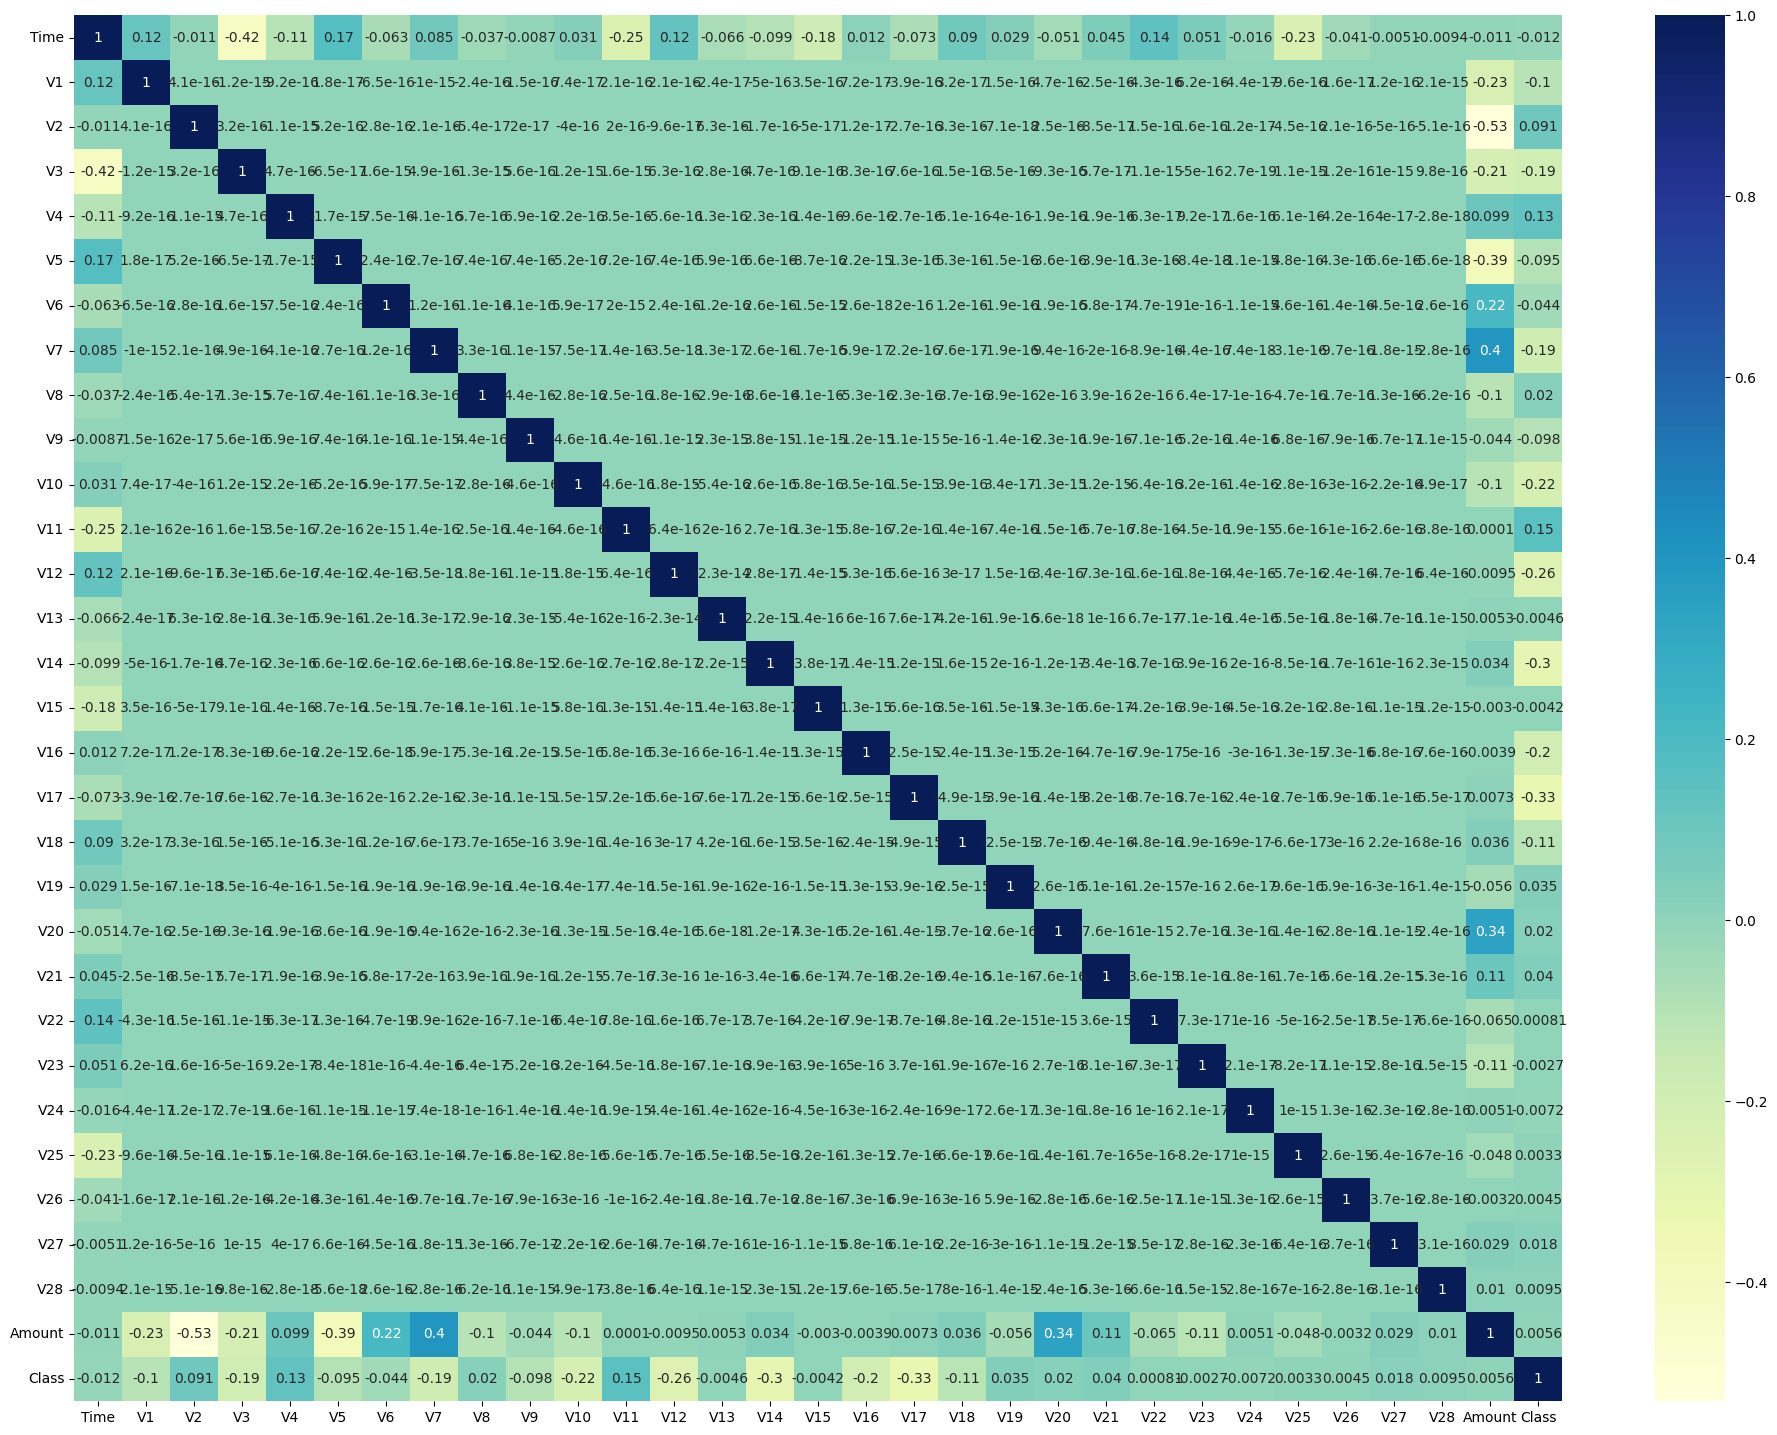

In [15]:
# plotting correlations using heatmap


plt.figure(figsize=(24,18))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


In [16]:
#Here we will observe the distribution of our classes
classes=data_frame['Class'].value_counts()
nmlshare=classes[0]/data_frame['Class'].count()*100
frd_share=classes[1]/data_frame['Class'].count()*100

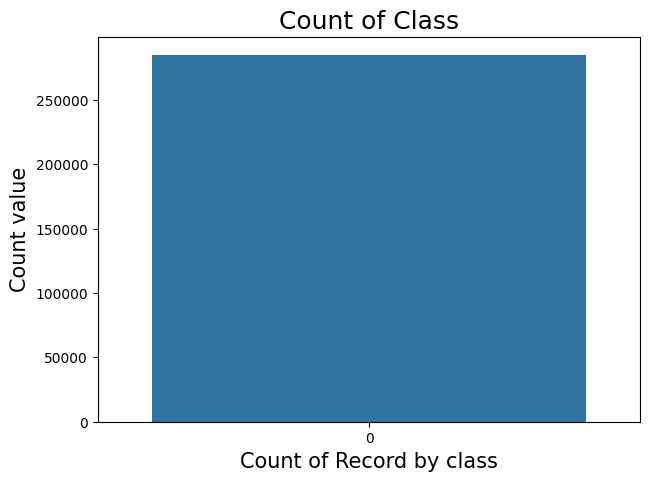

In [17]:
# This code aims to create a bar plot showing the number and percentage of fraudulent versus non-fraudulent transactions.

plt.figure(figsize=(7,5))
sns.countplot(data_frame['Class'])
plt.title("Count of Class", fontsize=18)
plt.xlabel("Count of Record by class", fontsize=15)
plt.ylabel("Count value", fontsize=15)
plt.show()

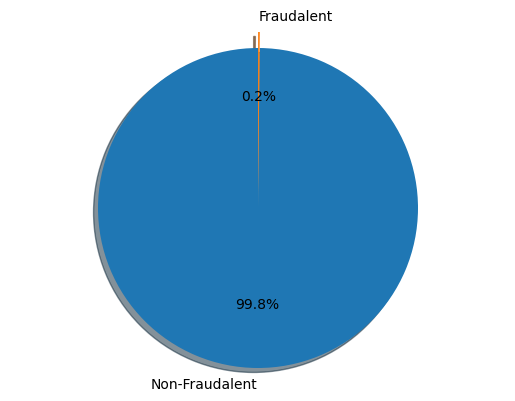

In [18]:

classes=data_frame['Class'].value_counts()
nmlshare=classes[0]/data_frame['Class'].count()*100
frd_share=classes[1]/data_frame['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [nmlshare, frd_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

In [19]:
print('The percentage without churn prediction is ', round(data_frame['Class'].value_counts()[0]/len(data_frame) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(data_frame['Class'].value_counts()[1]/len(data_frame) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(data_frame['Class'].value_counts()[1]/data_frame['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17



The provided information indicates that out of 284807 total credit card transactions, there were only 492 fraudulent transactions. This shows that we are dealing with a highly imbalanced problem, where the number of genuine transactions far exceeds the number of fraudulent ones. As a result, a model that predicts the majority class (i.e., genuine transactions) will achieve high accuracy. To address this issue, we will employ alternative metrics for evaluating the model's performance, such as ROC-AUC, precision, and recall.


In [20]:
#The purpose of this code is to generate a scatter plot that shows the distribution of classes over time. Since time is presented in a relative format, we will utilize pandas.Timedelta, which represents the difference between two dates or times.
Delta_Time = pd.to_timedelta(data_frame['Time'], unit='s')
#This code snippet aims to create derived columns for minutes and hours.
data_frame['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
data_frame['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
data_frame['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)



Text(0.5, 1.05, 'Time vs Class Distribution')

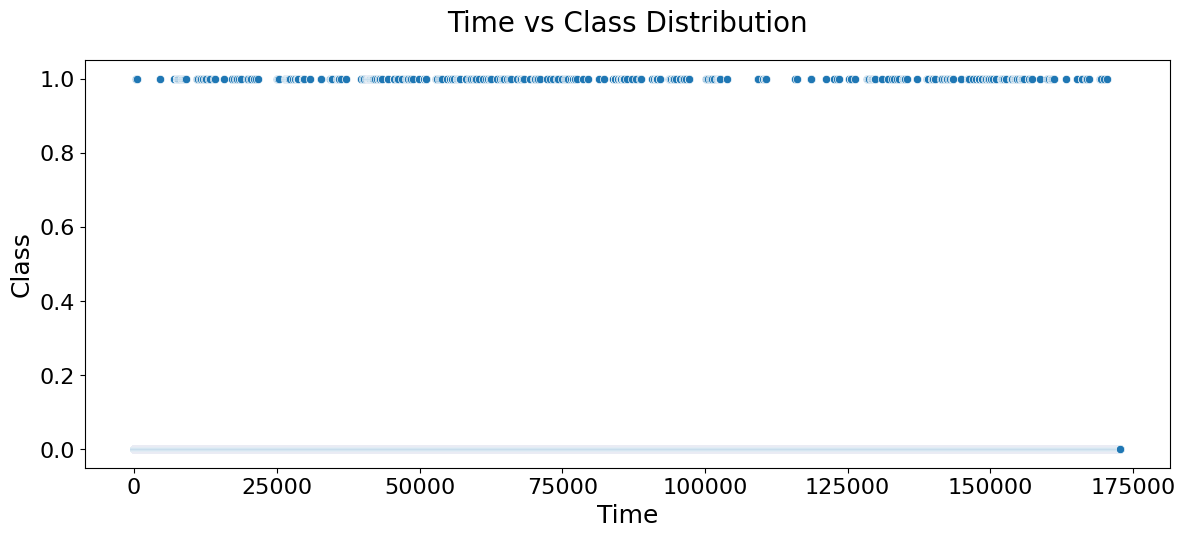

In [21]:
# The objective of this code is to conduct bivariate analysis by generating a scatter plot that shows the distribution of classes over time.

fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

# The purpose of this code is to plot the relationship between the variables.

plt.subplot(3,1,1)
sns.scatterplot(x=data_frame['Time'], y='Class', palette=cmap, data=data_frame)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)


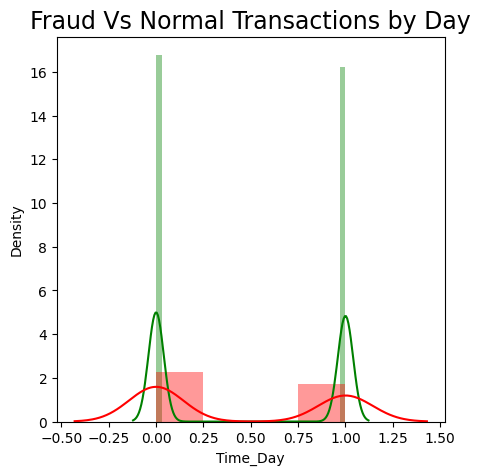

In [22]:
#TThis code is intended to plot the number of fraud and normal transactions per day.
plt.figure(figsize=(5,5))
sns.distplot(data_frame[data_frame['Class'] == 0]["Time_Day"], color='green')
sns.distplot(data_frame[data_frame['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

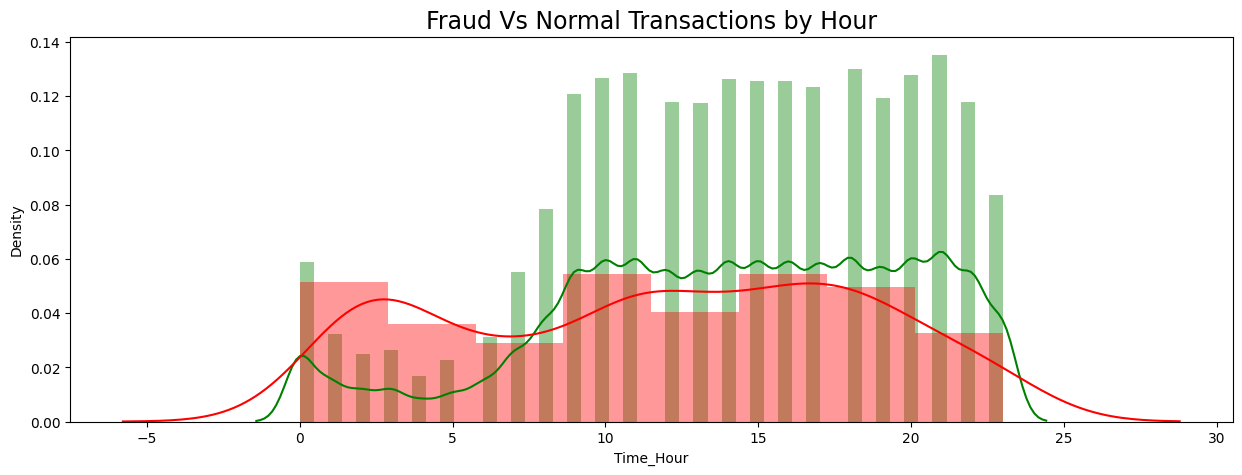

In [23]:
#This code is intended to plot the number of fraud and normal transactions per hour.
plt.figure(figsize=(15,5))
sns.distplot(data_frame[data_frame['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(data_frame[data_frame['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

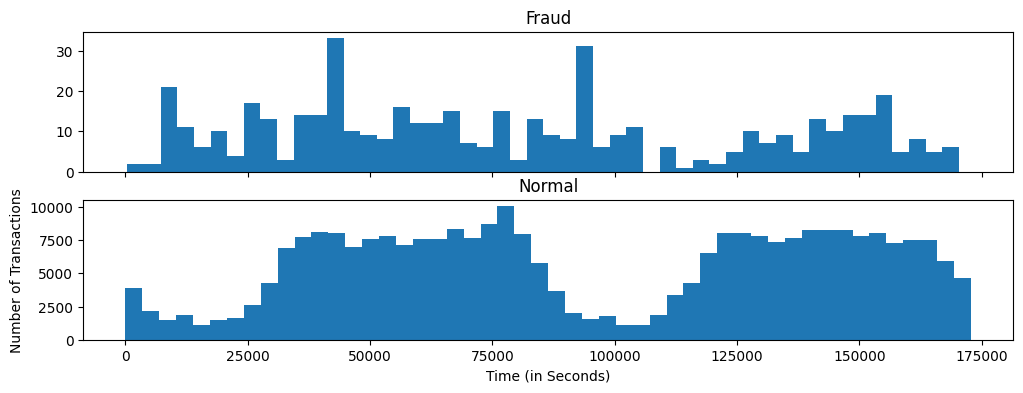

In [24]:
#plotting time vs number of transaction graph
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(data_frame.Time[data_frame.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data_frame.Time[data_frame.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [25]:
#The purpose of this code is to generate a scatter plot that shows the distribution of classes over the amount variable, with the intention of differentiating between fraudulent and non-fraudulent transactions.
data_frame_Fraud = data_frame[data_frame['Class'] == 1]
data_frame_Regular = data_frame[data_frame['Class'] == 0]

# The objective of this code is to generate descriptive statistics for the amount variable for fraudulent transactions.
print(data_frame_Fraud["Amount"].describe())


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [26]:
#The aim of this code is to generate descriptive statistics for the amount variable for regular (non-fraudulent) transactions.
print(data_frame_Regular["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.05, 'Amount vs Class Distribution')

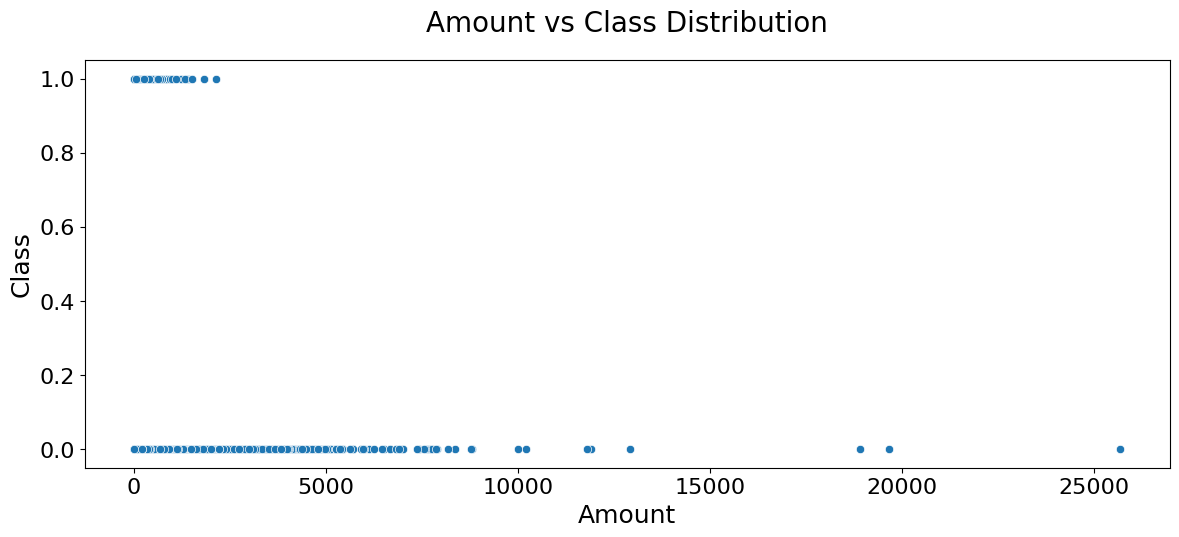

In [27]:
#The code is for creating a scatter plot to study the relationship between the amount variable and the class variable (fraudulent or regular transactions). The plot will help us understand the distribution of classes with respect to the amount variable.


fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# Create a plot to visualize the relationship between the variables.

plt.subplot(3,1,1)
sns.scatterplot(x=data_frame['Amount'], y='Class', palette=cmap, data=data_frame)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)


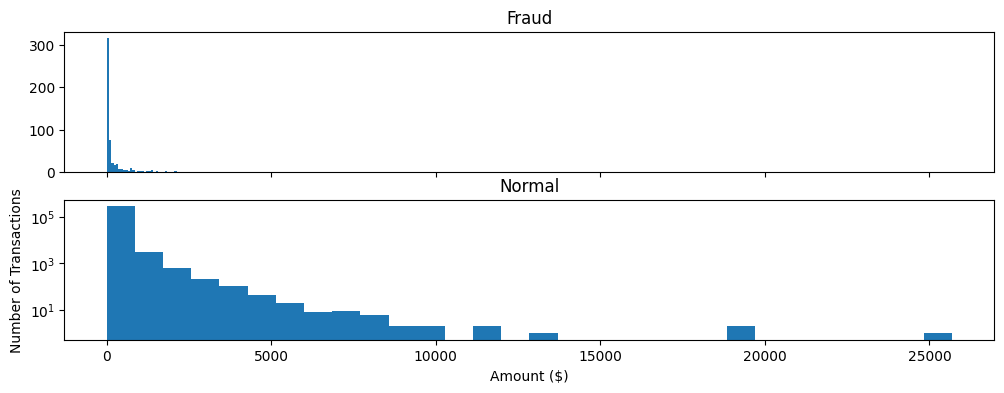

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(data_frame.Amount[data_frame.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data_frame.Amount[data_frame.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [29]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = data_frame.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


Correlation
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413

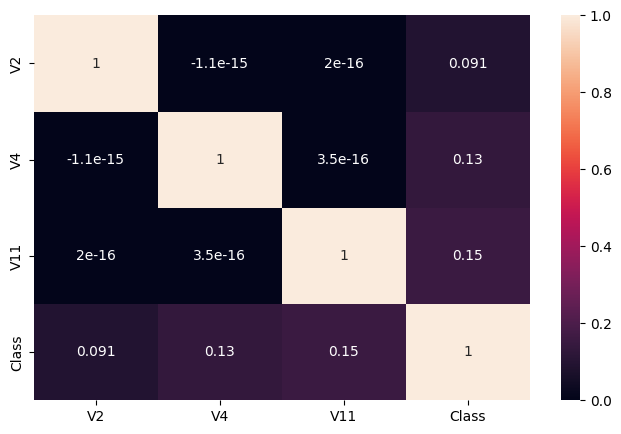

In [30]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = data_frame[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

### Plotting the distribution of a variable

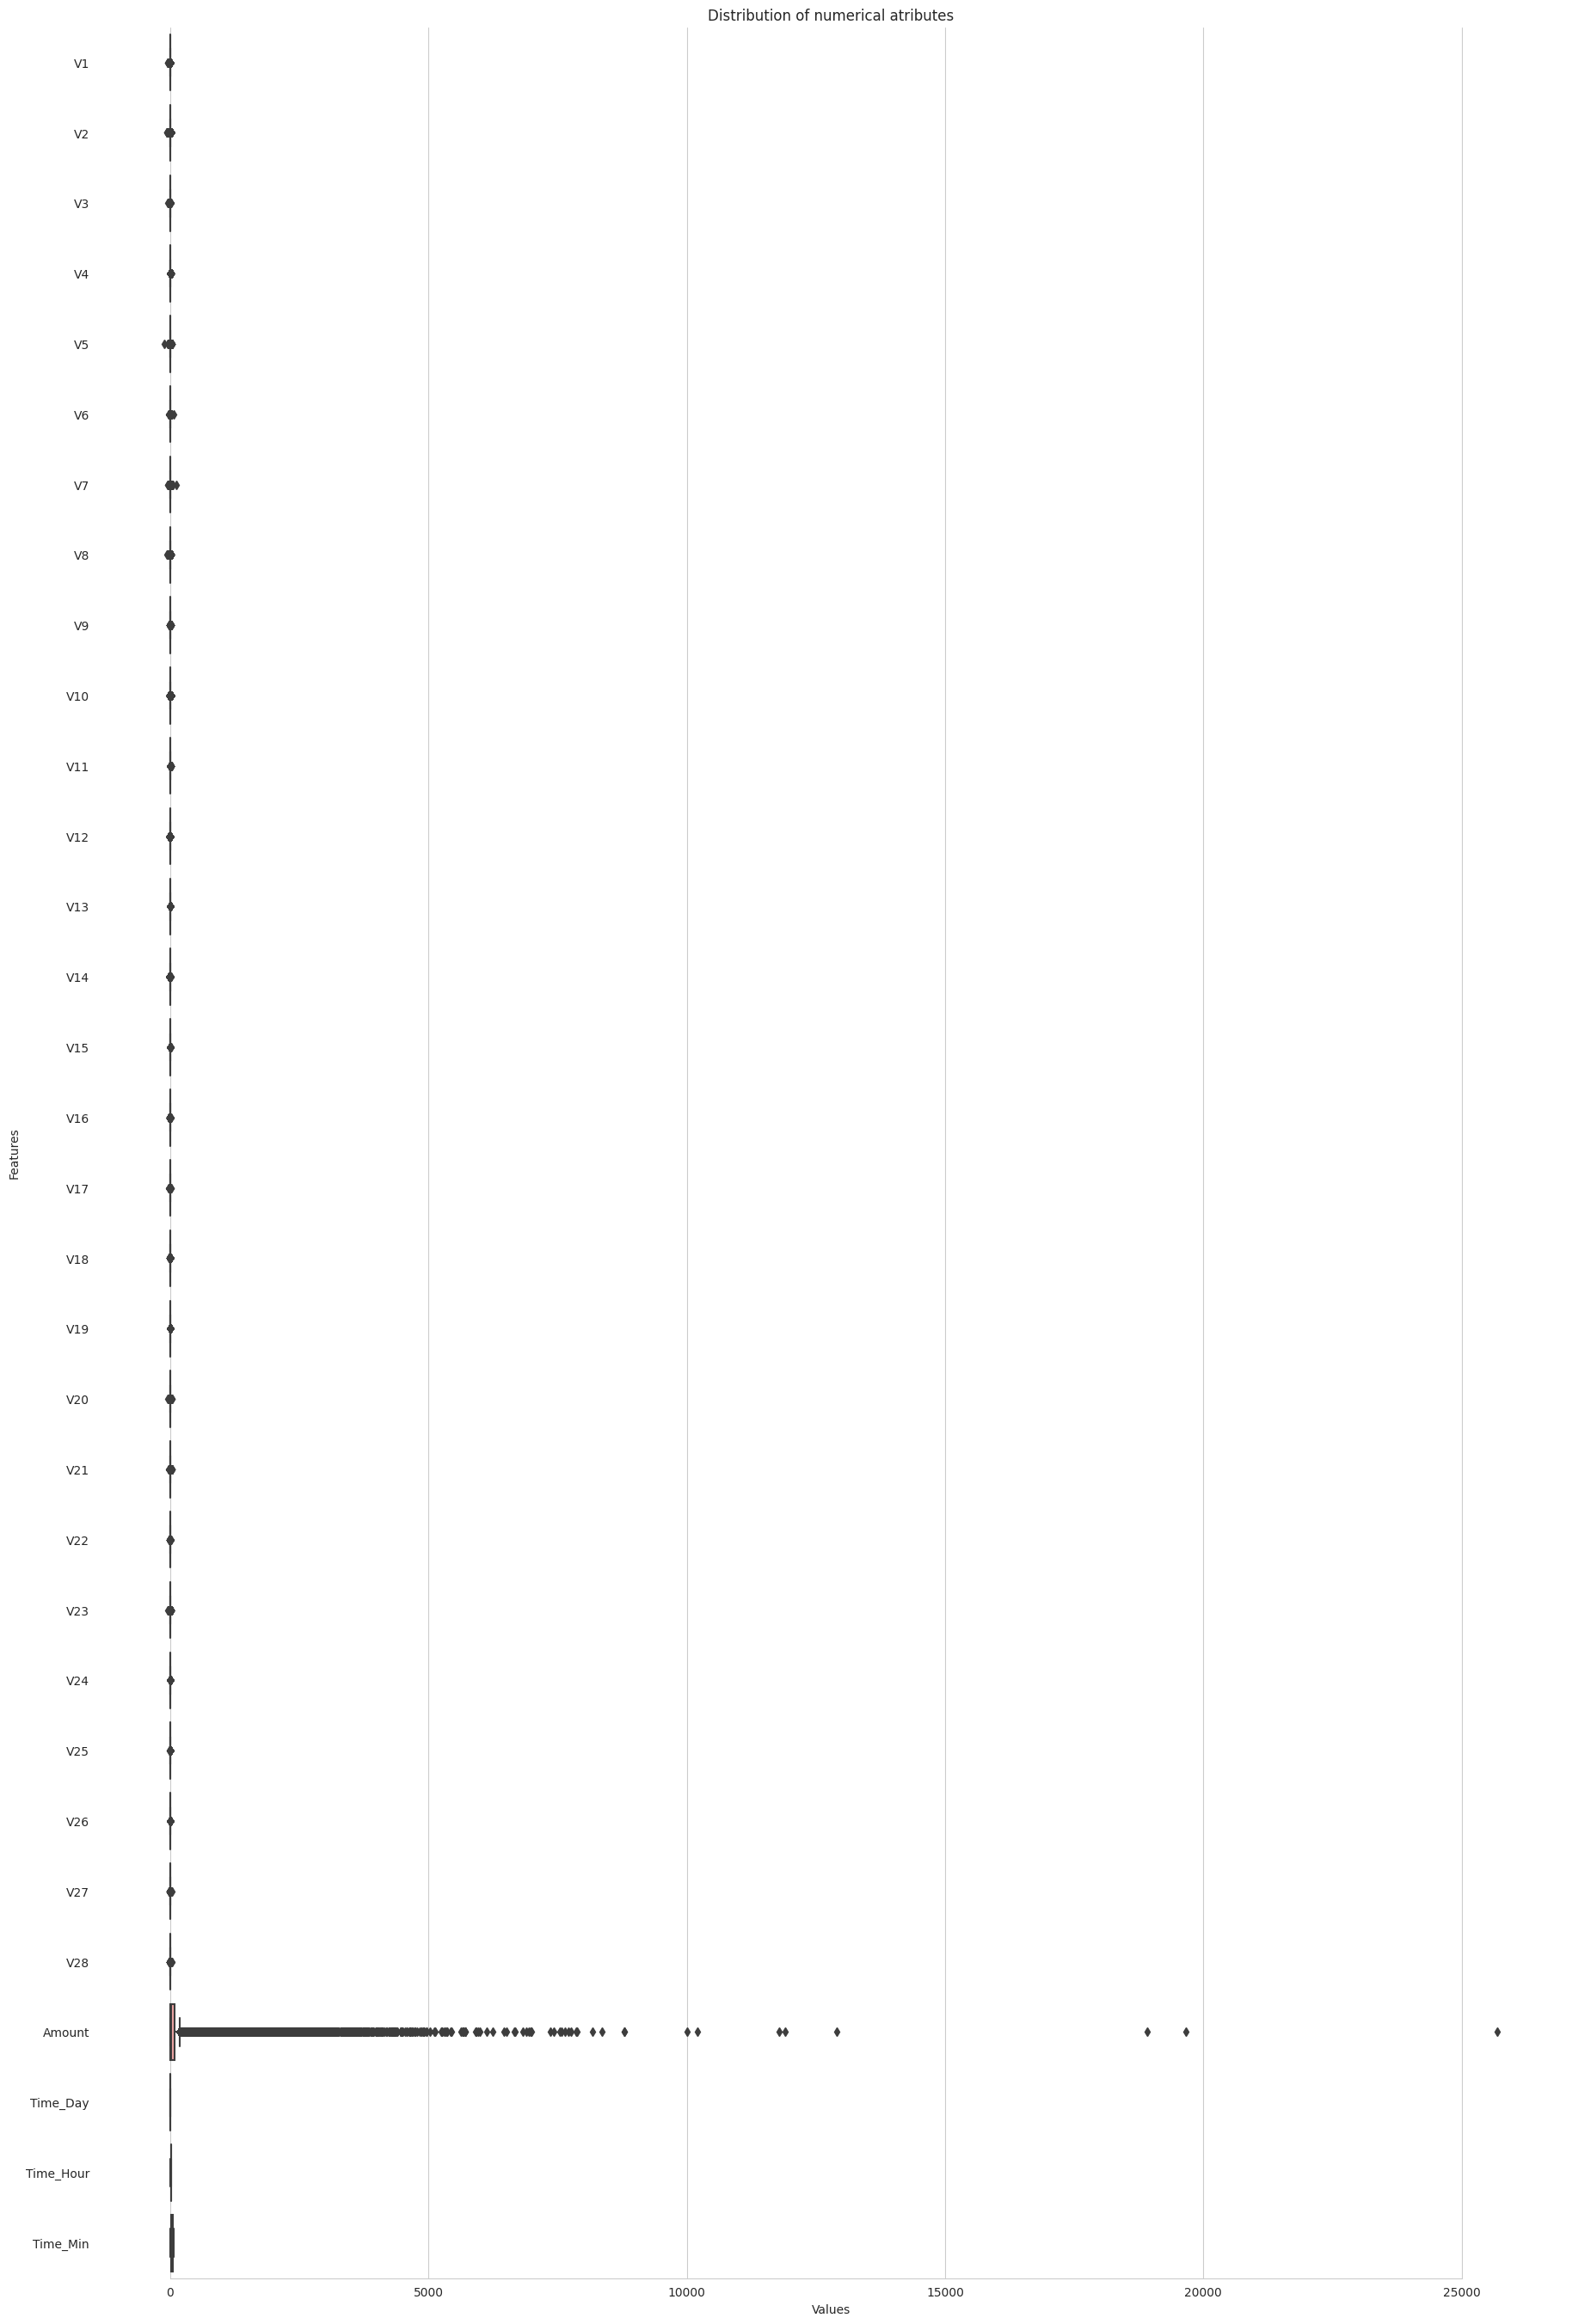

In [31]:
# Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical feature from the dataframe:
numeric_features = data_frame.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
li_not_plot = ['Class','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22,34))
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=data_frame[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

In [32]:
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
data_frame.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
data_frame.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

In [33]:
# Let's try to understand the Amount variable as it is not PCA transformed variable :

# plt.figure(figsize=(24, 12))

# plt.subplot(2,2,1)
# plt.title('Amount Distribution')
# data_frame['Amount'].astype(int).plot.hist();
# plt.xlabel("variable Amount")
# #plt.ylabel("Frequency")

# plt.subplot(2,2,2)
# plt.title('Amount Distribution')
# sns.set()
# plt.xlabel("variable Amount")
# plt.hist(data_frame['Amount'],bins=100)
# plt.show()


### Splitting the data into train & test data

In [34]:
#Create X and y dataset for independent and dependent data
y= data_frame['Class']
X = data_frame.drop(['Class'], axis=1)

In [35]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Time_Hour  
0  0.128539 -0.189115  0.133558 -0.021053  149.62          0  
1  0.167170  0.125895 -0.008983  0.014724    2.69          0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66          0  
3  0.647376 -0.221929  0.062723  0.061458  123.50          0  
4 -0.206010  0.502292  0.219422  0.215153   69.99          0  

[5 rows x 30 columns]

In [36]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [37]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

In [38]:
cols = list(X.columns.values)

In [39]:
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

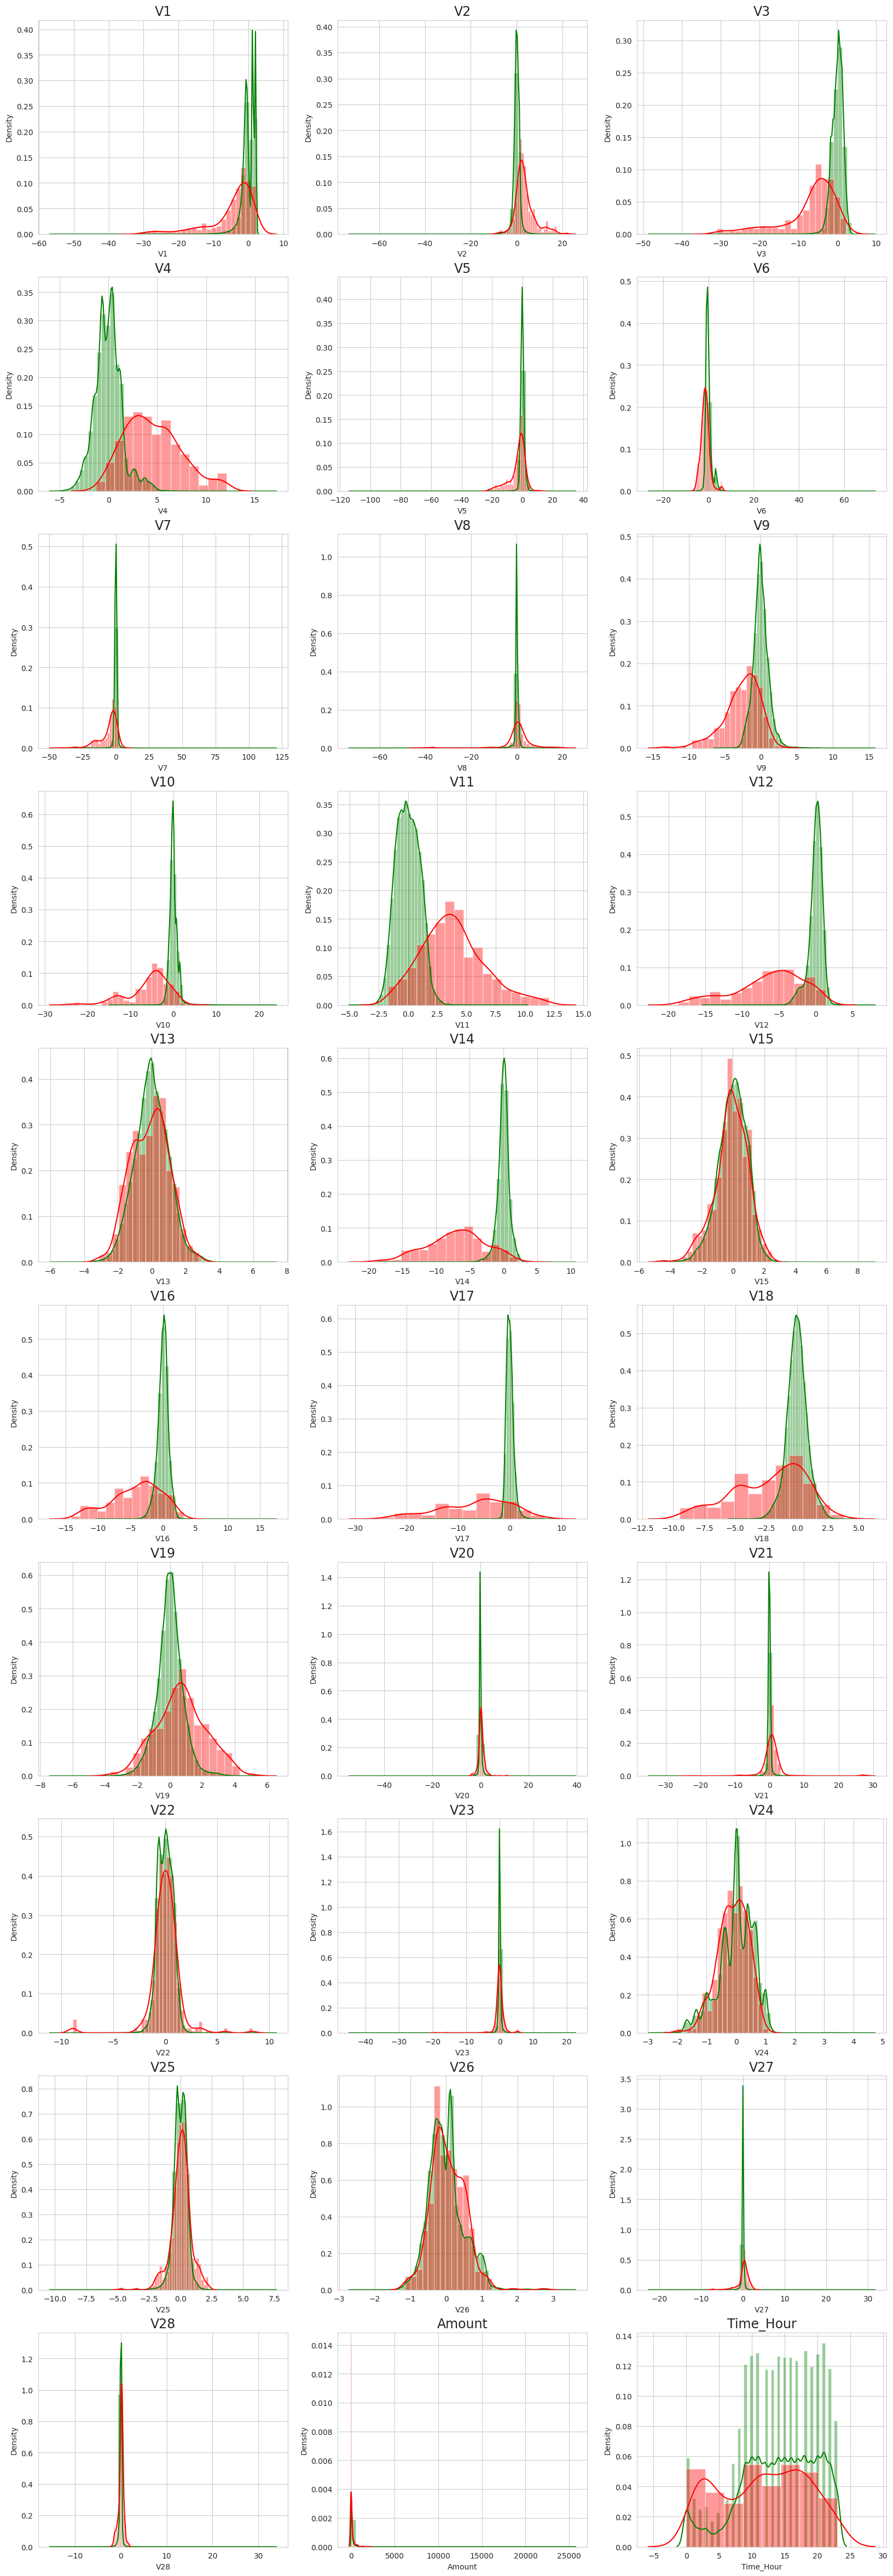

In [40]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = data_frame.Class == 0
fraud_records = data_frame.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()




#Create model functions for Logistic Regress, KNN, SVM, Decision Tree, Random Forest, XGBoost

In [41]:
#Create a dataframe to store results
data_frame_Results = pd.DataFrame(columns=['Data_Imbalance_Handling','Model','Accuracy','roc_value','threshold'])

In [42]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [43]:
def buildAndRunLogisticModels(data_frame_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  data_frame_Results = data_frame_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  data_frame_Results = data_frame_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return data_frame_Results

In [44]:
def buildAndRunKNNModels(data_frame_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  data_frame_Results = data_frame_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return data_frame_Results




In [45]:
def buildAndRunSVMModels(data_frame_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  data_frame_Results = data_frame_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return data_frame_Results

In [46]:
def buildAndRunTreeModels(data_frame_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      data_frame_Results = data_frame_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return data_frame_Results
      


In [47]:
def buildAndRunRandomForestModels(data_frame_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  data_frame_Results = data_frame_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return data_frame_Results

In [48]:
def buildAndRunXGBoostModels(data_frame_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  ModelXGB = XGBClassifier(random_state=42)
  ModelXGB.fit(X_train, y_train)
  y_pred = ModelXGB.predict(X_test)

  XGB_test_score = ModelXGB.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = ModelXGB.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_val_xgb = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(roc_val_xgb))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  data_frame_Results = data_frame_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': roc_val_xgb,'threshold': threshold}, index=[0]),ignore_index= True)

  return data_frame_Results
  



### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [49]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)


In [50]:
#Create Dataframe
X_train_pt_data_frame = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_data_frame = pd.DataFrame(data=X_test_pt,   columns=cols)

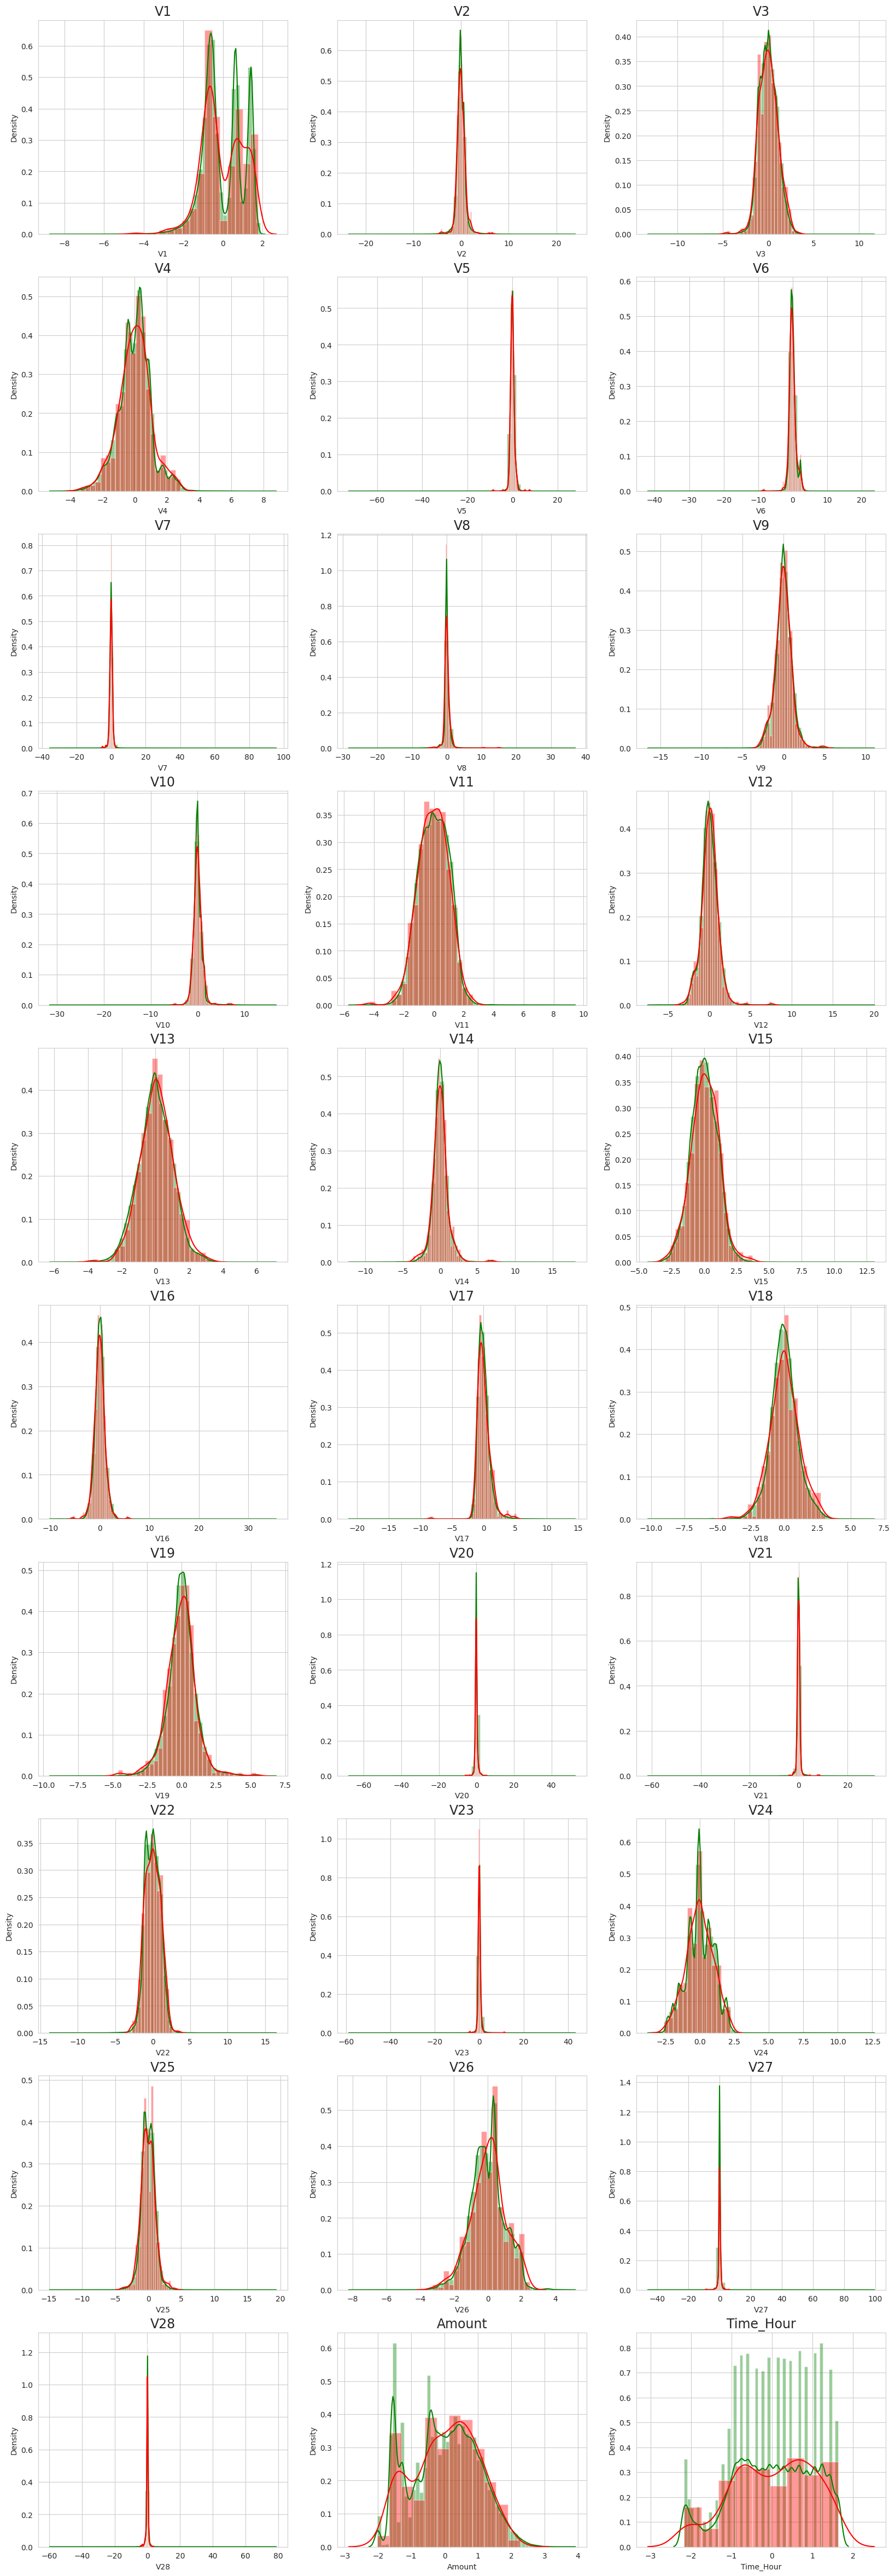

In [51]:
# plot the histogram of a variable from the train dataset again to see the result 

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_data_frame[col][normal_records], color='green')
  sns.distplot(X_train_pt_data_frame[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()


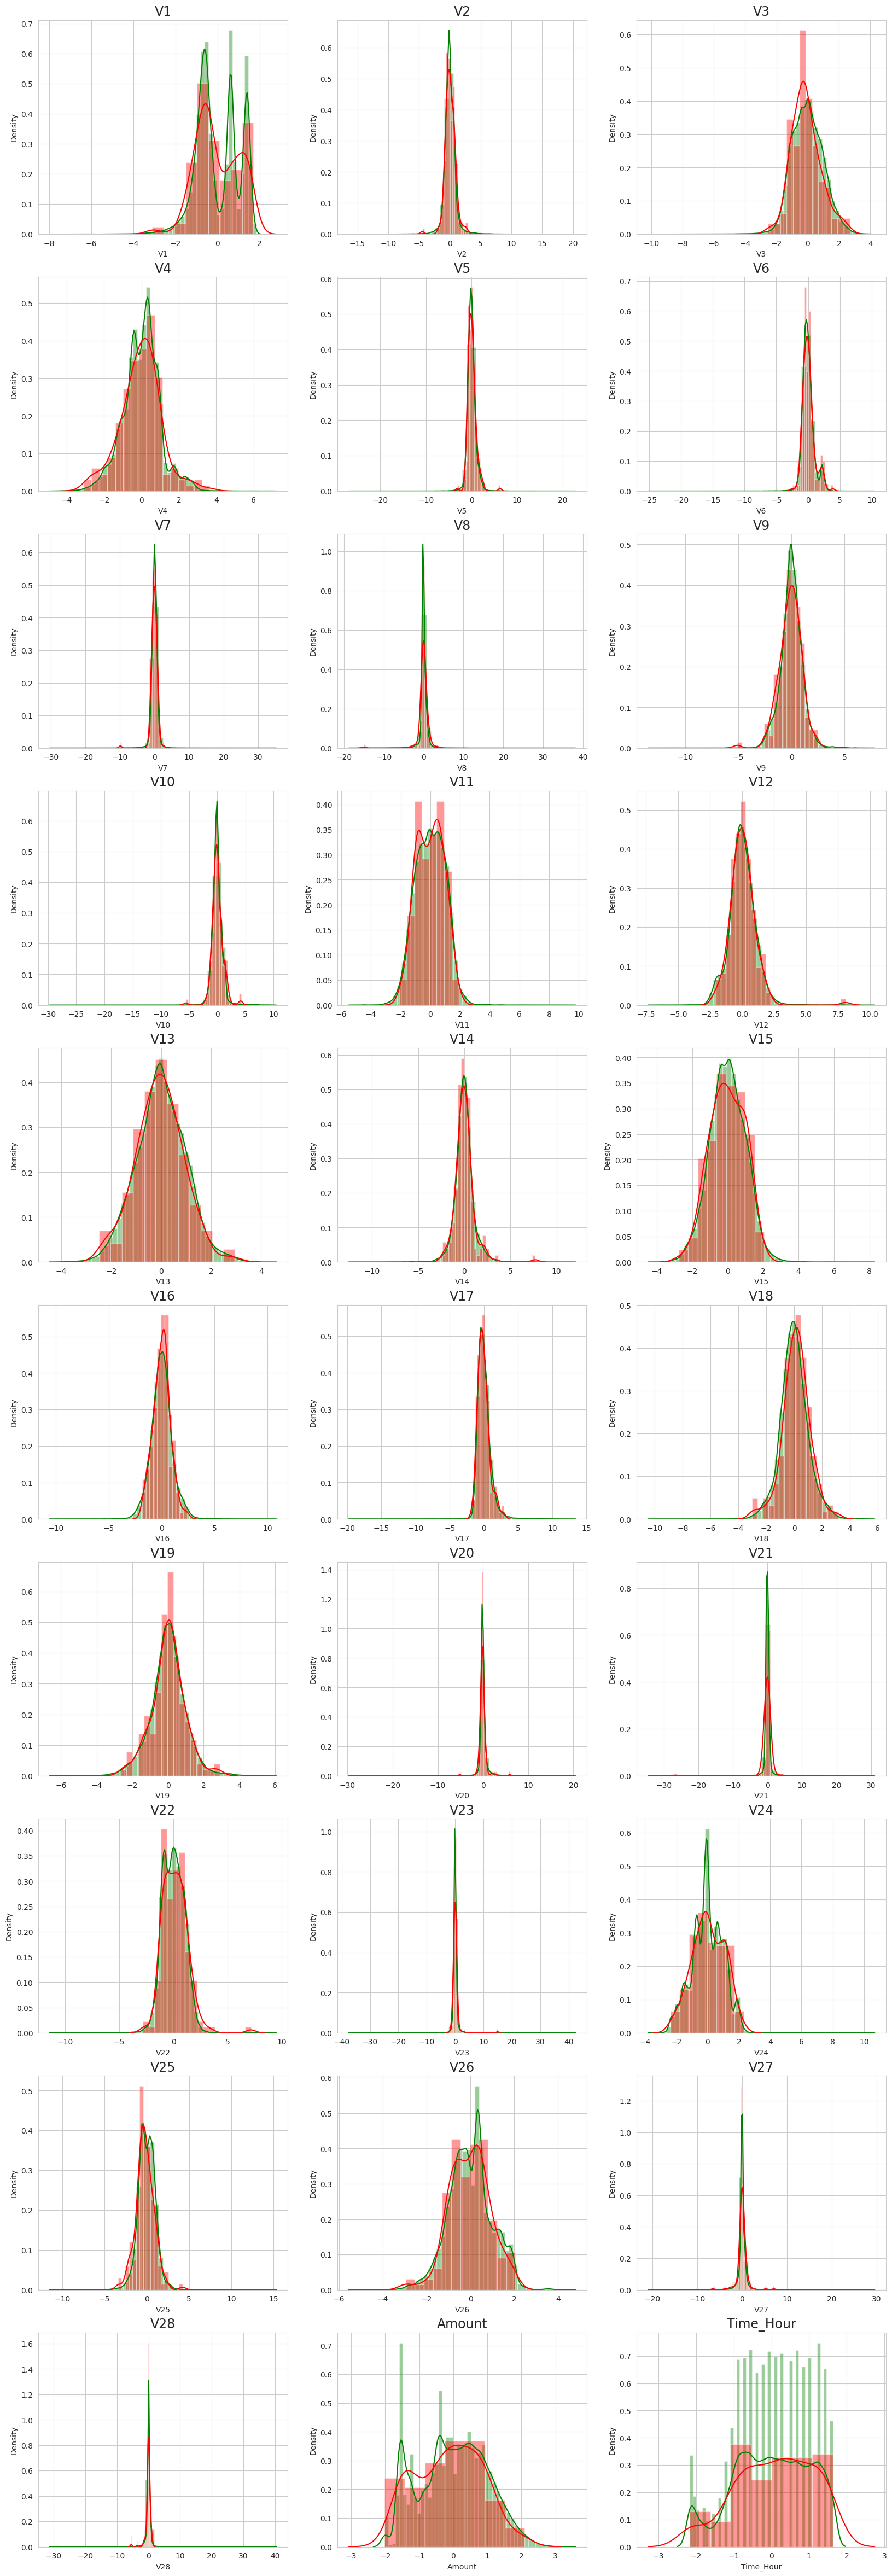

In [52]:
# plot the histogram of a variable from the test dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_data_frame[col][normal_records], color='green')
  sns.distplot(X_test_pt_data_frame[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.983760023970567
Max auc_roc for l1: 0.985410899045824
Parameters for l2 regularisations
[[-0.09276541 -0.06828297 -0.28652331  0.55493742  0.02789795  0.01396825
  -0.06824953 -0.20408006 -0.18143666 -0.20371291  0.17699967 -0.50183428
  -0.11614819 -0.66830552 -0.0815942  -0.18013738 -0.08164992  0.03866812
  -0.03807332 -0.02310099  0.10465199  0.10090233 -0.03198749 -0.02939204
   0.01001787  0.00785392 -0.04474827 -0.02229527  0.02208228  0.08474082]]
[-8.07230494]
{1: array([[0.90398235, 0.90383704, 0.90383704, 0.90383704, 0.90383704,
        0.90419481, 0.96804377, 0.99255279, 0.99488378, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346],
       [0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 ,
        0.93091836, 0.96502028, 0.98005776, 0.97844439, 0.97856203,
        0.97856203, 0.97856203, 0.9785620

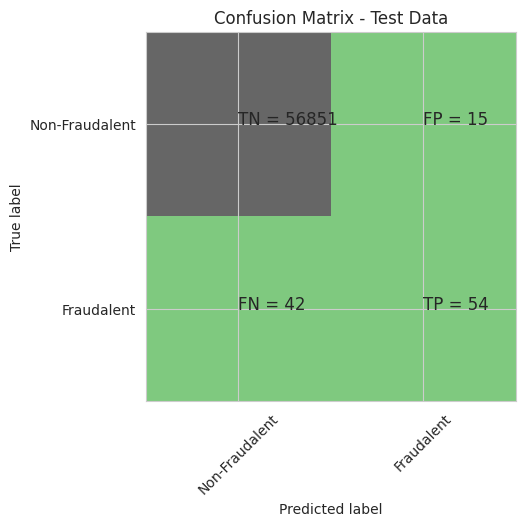

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9988413328183702
Confusion Matrix


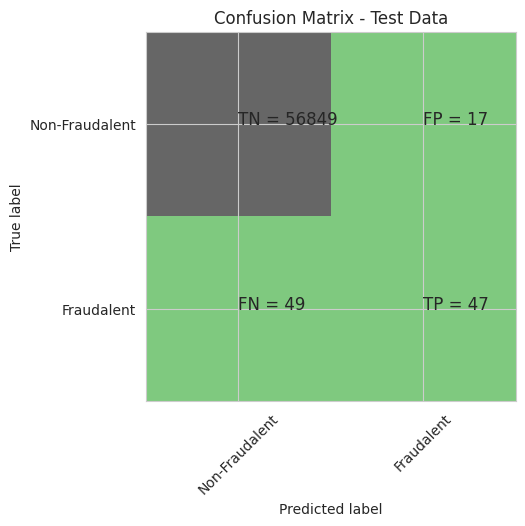

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9668061026506759
l2 threshold: 0.0012891785769825266
ROC for the test dataset 96.7%


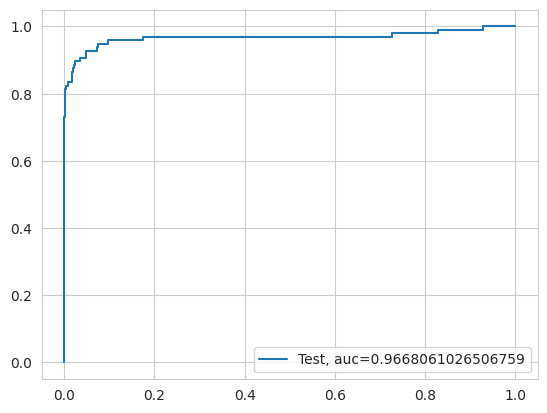

l1 roc_value: 0.9639030791685718
l1 threshold: 0.009276493848975954
ROC for the test dataset 96.4%


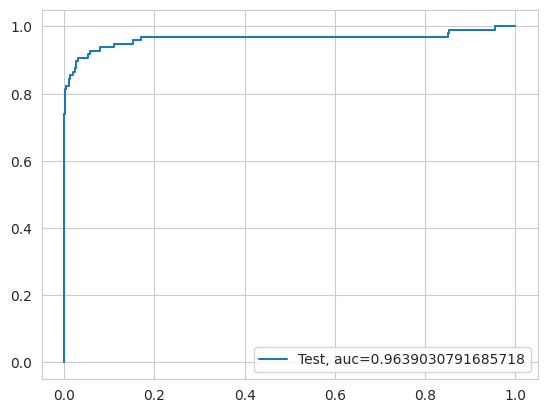

Time Taken by Model: --- 181.68592739105225 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9992977774656788
Confusion Matrix


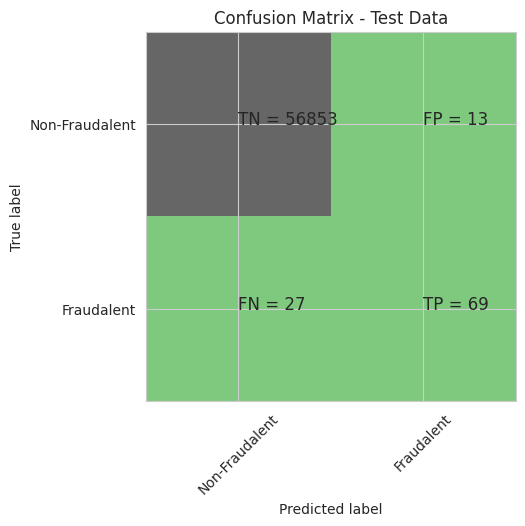

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.900851068740548
KNN threshold: 0.2
ROC for the test dataset 90.1%


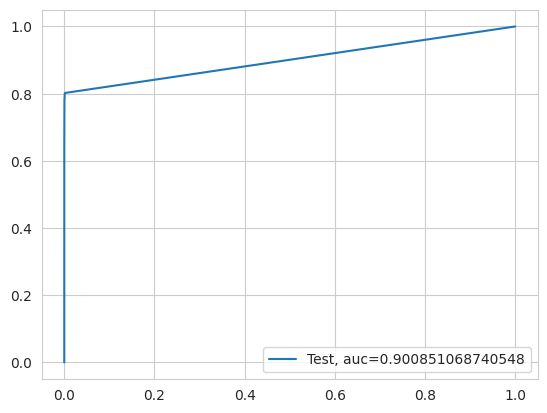

Time Taken by Model: --- 262.14381742477417 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988062216916541
Confusion Matrix


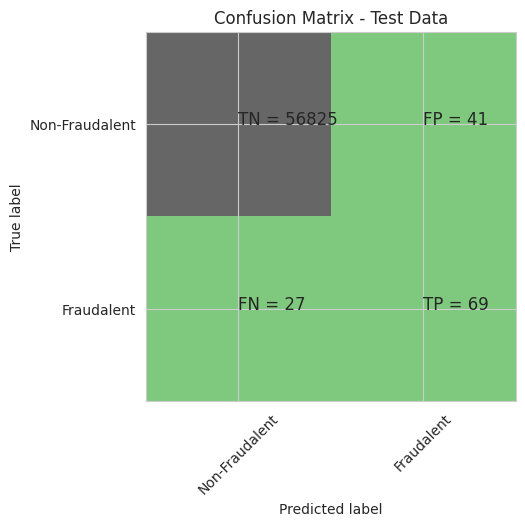

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8590145033939437
Tree threshold: 1.0
ROC for the test dataset 85.9%


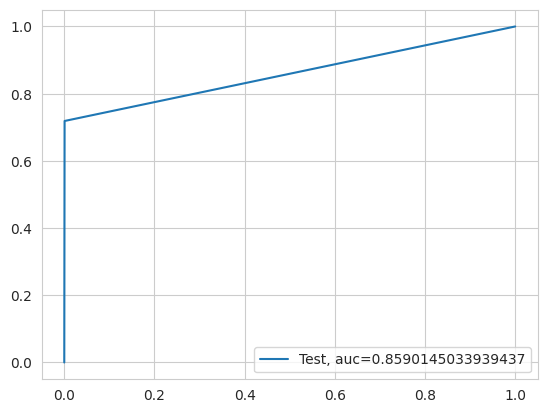

entropy score: 0.9990519995786665
Confusion Matrix


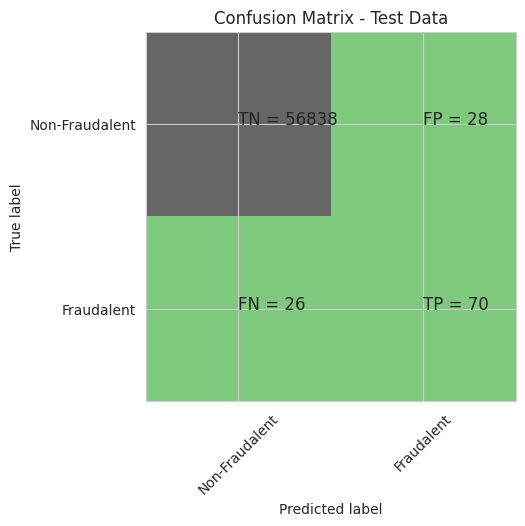

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.73      0.72        96

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8643371405291973
Tree threshold: 1.0
ROC for the test dataset 86.4%


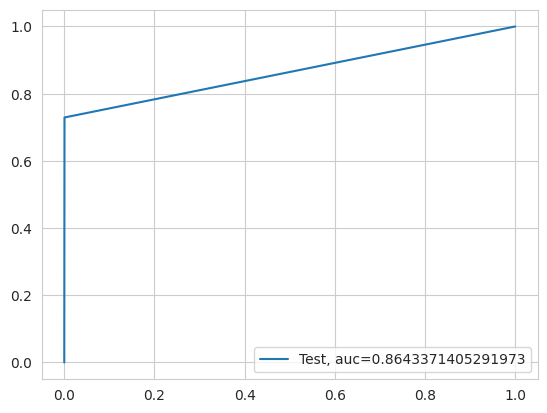

Time Taken by Model: --- 40.65041947364807 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


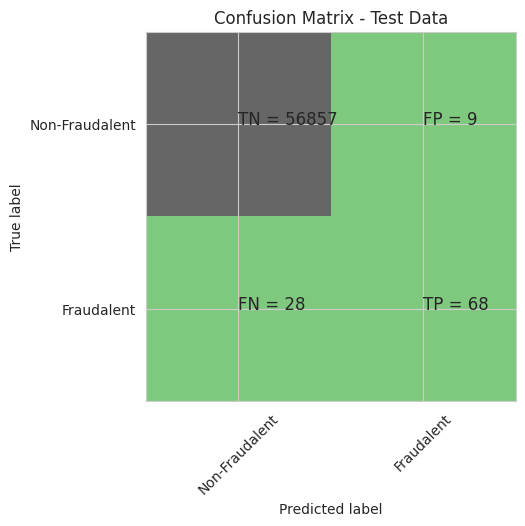

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.940564037972309
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


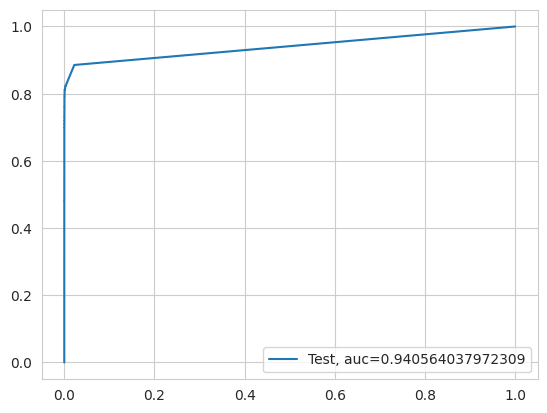

Time Taken by Model: --- 277.14044070243835 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994557775359011
Confusion Matrix


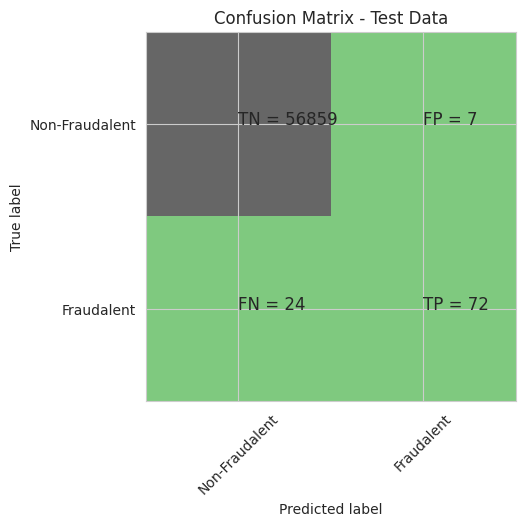

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.75      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

XGboost roc_value: 0.9729984744838744
XGBoost threshold: 5.146709372638725e-05
ROC for the test dataset 97.3%


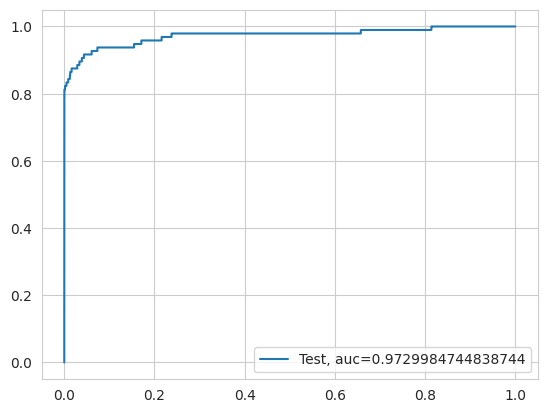

Time Taken by Model: --- 125.93945407867432 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9985604438046417
Confusion Matrix


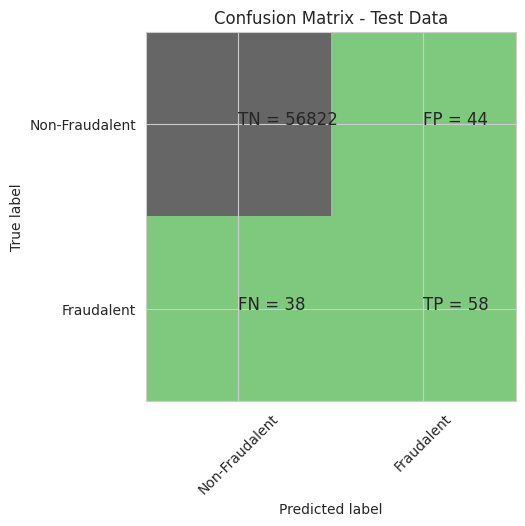

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.78      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8913136620886528
SVM threshold: 0.001206817182235521
ROC for the test dataset 89.1%


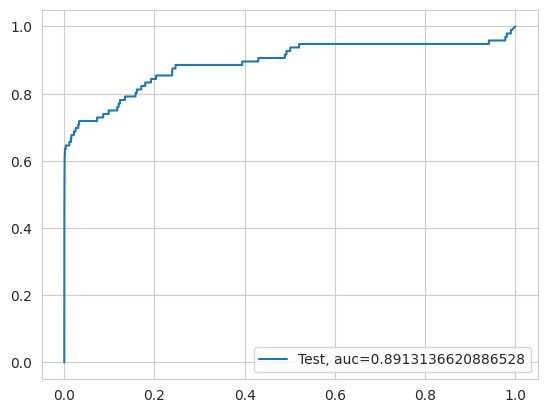

Time Taken by Model: --- 113.16743993759155 seconds ---


In [53]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
data_frame_Results = buildAndRunLogisticModels(data_frame_Results,"Power Transformer",X_train_pt_data_frame,y_train, X_test_pt_data_frame, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
data_frame_Results = buildAndRunKNNModels(data_frame_Results,"Power Transformer",X_train_pt_data_frame,y_train, X_test_pt_data_frame, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
data_frame_Results = buildAndRunTreeModels(data_frame_Results,"Power Transformer",X_train_pt_data_frame,y_train, X_test_pt_data_frame, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
data_frame_Results = buildAndRunRandomForestModels(data_frame_Results,"Power Transformer",X_train_pt_data_frame,y_train, X_test_pt_data_frame, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
data_frame_Results = buildAndRunXGBoostModels(data_frame_Results,"Power Transformer",X_train_pt_data_frame,y_train, X_test_pt_data_frame, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
data_frame_Results = buildAndRunSVMModels(data_frame_Results,"Power Transformer",X_train_pt_data_frame,y_train, X_test_pt_data_frame, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [54]:
data_frame_Results.head()

Data_Imbalance_Handling                                       Model  \
0       Power Transformer  Logistic Regression with L2 Regularisation   
1       Power Transformer  Logistic Regression with L1 Regularisation   
2       Power Transformer                                         KNN   
3       Power Transformer               Tree Model with gini criteria   
4       Power Transformer            Tree Model with entropy criteria   

   Accuracy  roc_value  threshold  
0  0.998999   0.966806   0.001289  
1  0.998841   0.963903   0.009276  
2  0.999298   0.900851   0.200000  
3  0.998806   0.859015   1.000000  
4  0.999052   0.864337   1.000000

# Perform cross validation with RepeatedKFold

In [55]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [     0      1      3 ... 284804 284805 284806] TEST: [     2      4      9 ... 284793 284794 284797]
TRAIN: [     1      2      3 ... 284802 284803 284805] TEST: [     0      8     12 ... 284799 284804 284806]
TRAIN: [     0      2      4 ... 284801 284804 284806] TEST: [     1      3      5 ... 284802 284803 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    13     14     17 ... 284790 284791 284800]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     6     10     16 ... 284792 284798 284801]
TRAIN: [     0      2      3 ... 284802 284803 284804] TEST: [     1      9     14 ... 284792 284805 284806]
TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0      7      8 ... 284784 284785 284803]
TRAIN: [     0      1      4 ... 284804 284805 284806] TEST: [     2      3      5 ... 284793 284795 284797]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [    10     12     15 ... 284798 284800 284804]
TRAIN: [     0     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9843651270205831
Max auc_roc for l1: 0.9732768339980085
Parameters for l2 regularisations
[[ 0.0057066   0.0399671  -0.08114622  0.23777881  0.10317222 -0.05530189
  -0.03575077 -0.11617516 -0.08339816 -0.1845123   0.15104995 -0.20954744
  -0.04866627 -0.38610147 -0.01157359 -0.10406866 -0.08888349 -0.00448419
   0.00171816 -0.00792613  0.03847523  0.03108582 -0.02004773 -0.00868647
  -0.01058118  0.00135029 -0.00922483  0.00332462  0.00042723  0.00837448]]
[-7.56332908]
{1: array([[0.62203494, 0.6242175 , 0.64670379, 0.79496709, 0.93110166,
        0.95480476, 0.97330251, 0.97773728, 0.98342093, 0.9853222 ,
        0.9853222 , 0.9853222 , 0.9853222 , 0.9853222 , 0.9853222 ,
        0.9853222 , 0.9853222 , 0.9853222 , 0.9853222 , 0.9853222 ],
       [0.6583445 , 0.66048779, 0.6808391 , 0.8034472 , 0.93835095,
        0.97091512, 0.9893034 , 0.98862462, 0.98565766, 0.98483743,
        0.98483743, 0.98483743, 0.98483

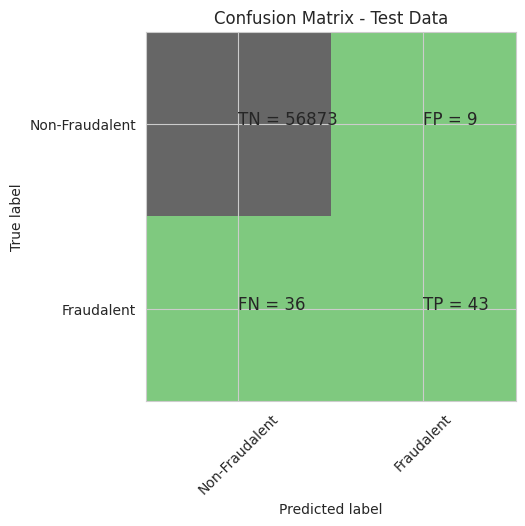

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56882
           1       0.83      0.54      0.66        79

    accuracy                           1.00     56961
   macro avg       0.91      0.77      0.83     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9991924299081828
Confusion Matrix


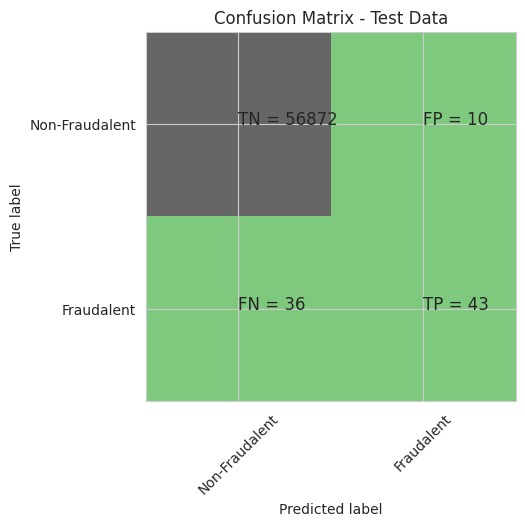

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56882
           1       0.81      0.54      0.65        79

    accuracy                           1.00     56961
   macro avg       0.91      0.77      0.83     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9825096502241594
l2 threshold: 0.0019098748467801343
ROC for the test dataset 98.3%


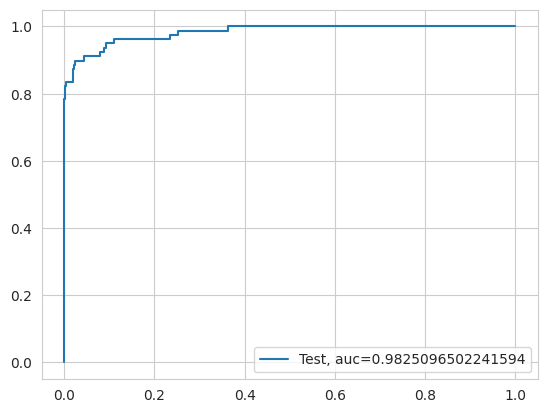

l1 roc_value: 0.836888624418572
l1 threshold: 0.05009478384615213
ROC for the test dataset 83.7%


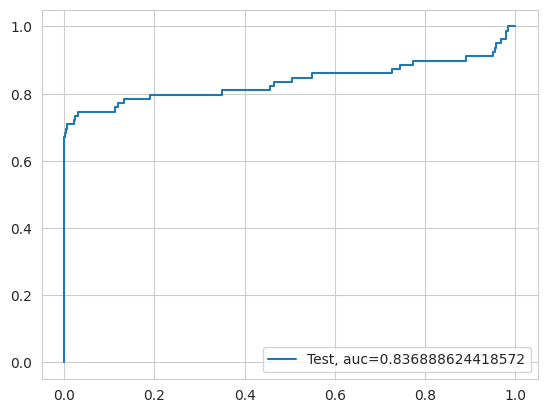

Time Taken by Model: --- 376.8992621898651 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9992450975228665
Confusion Matrix


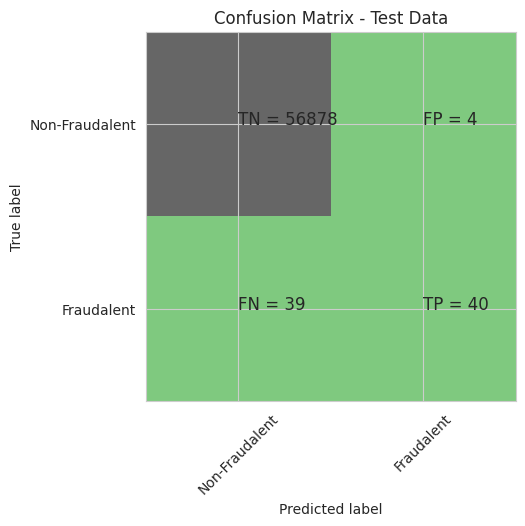

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56882
           1       0.91      0.51      0.65        79

    accuracy                           1.00     56961
   macro avg       0.95      0.75      0.83     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8225424696651605
KNN threshold: 0.2
ROC for the test dataset 82.3%


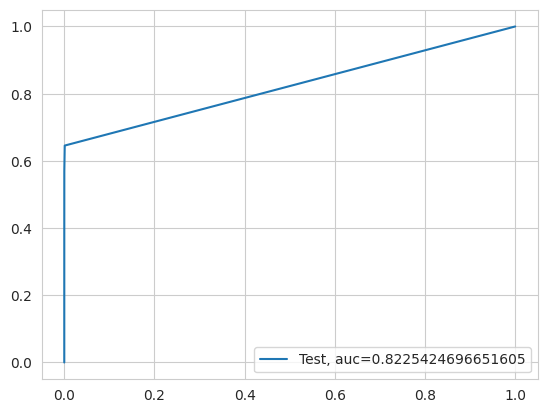

Time Taken by Model: --- 265.9235305786133 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9991748740366215
Confusion Matrix


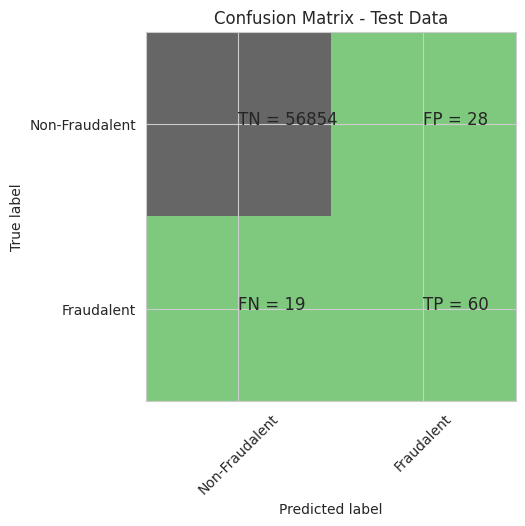

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56882
           1       0.68      0.76      0.72        79

    accuracy                           1.00     56961
   macro avg       0.84      0.88      0.86     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8795007118890138
Tree threshold: 1.0
ROC for the test dataset 88.0%


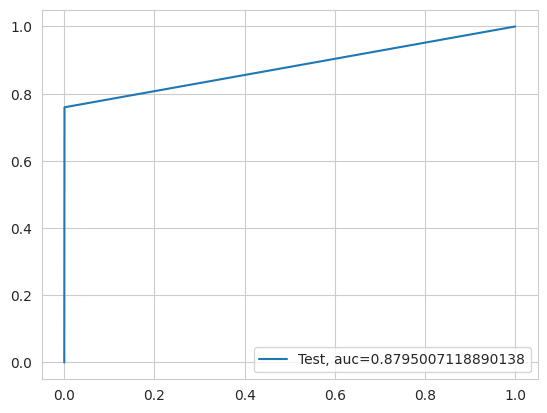

entropy score: 0.9993855444953564
Confusion Matrix


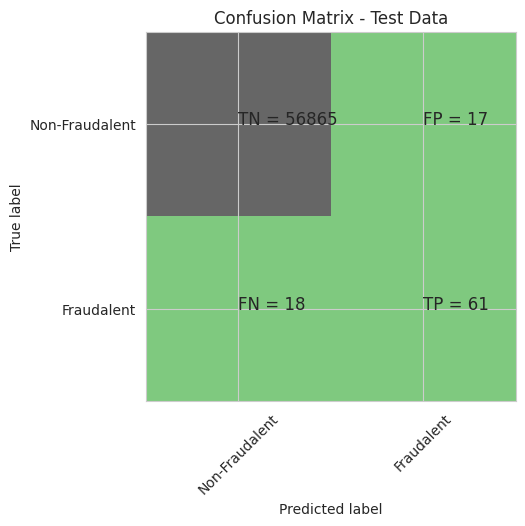

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56882
           1       0.78      0.77      0.78        79

    accuracy                           1.00     56961
   macro avg       0.89      0.89      0.89     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8859265172092884
Tree threshold: 1.0
ROC for the test dataset 88.6%


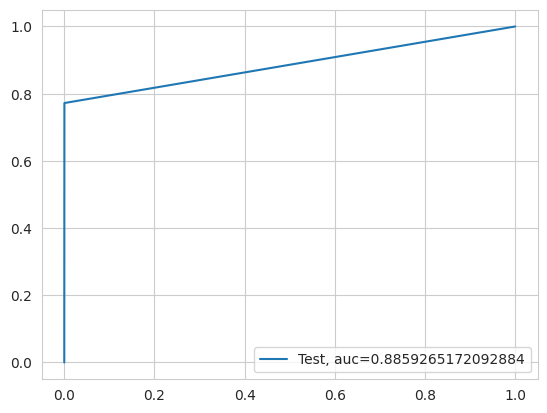

Time Taken by Model: --- 37.69628024101257 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9996488825687752
Confusion Matrix


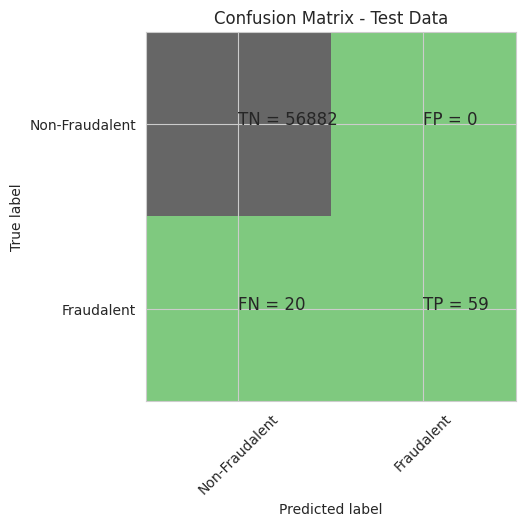

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56882
           1       1.00      0.75      0.86        79

    accuracy                           1.00     56961
   macro avg       1.00      0.87      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.947479993003504
Random Forest threshold: 0.01
ROC for the test dataset 94.7%


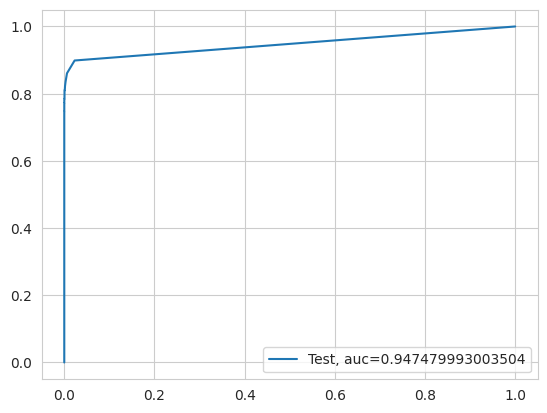

Time Taken by Model: --- 272.8132734298706 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9996664384403364
Confusion Matrix


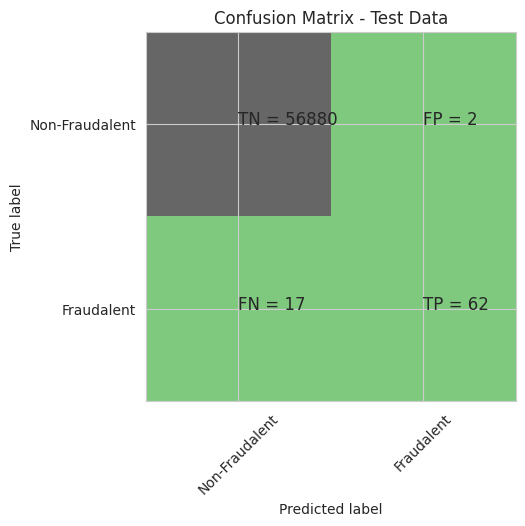

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56882
           1       0.97      0.78      0.87        79

    accuracy                           1.00     56961
   macro avg       0.98      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.974926329834937
XGBoost threshold: 0.0003083186747971922
ROC for the test dataset 97.5%


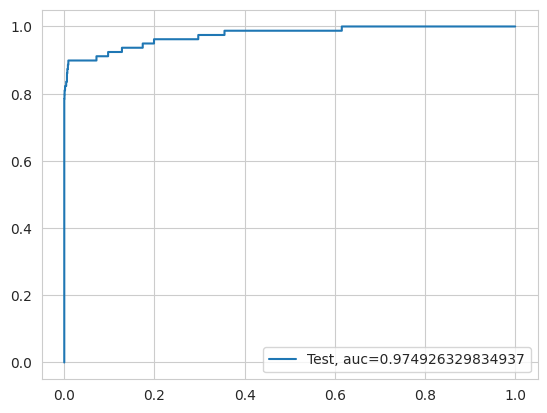

Time Taken by Model: --- 129.25701522827148 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9986481978897842
Confusion Matrix


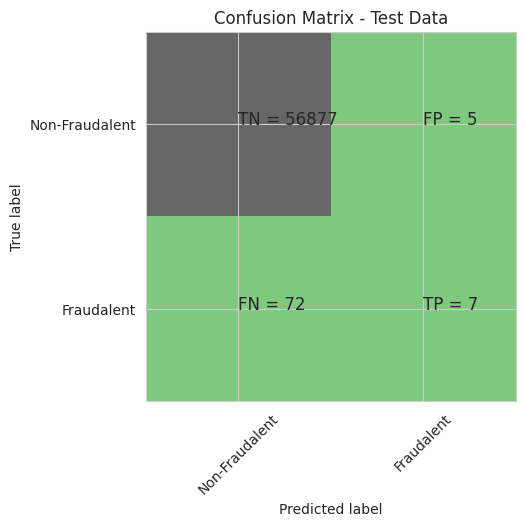

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56882
           1       0.58      0.09      0.15        79

    accuracy                           1.00     56961
   macro avg       0.79      0.54      0.58     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.5577531367401046
SVM threshold: 0.0018194731799628665
ROC for the test dataset 55.8%


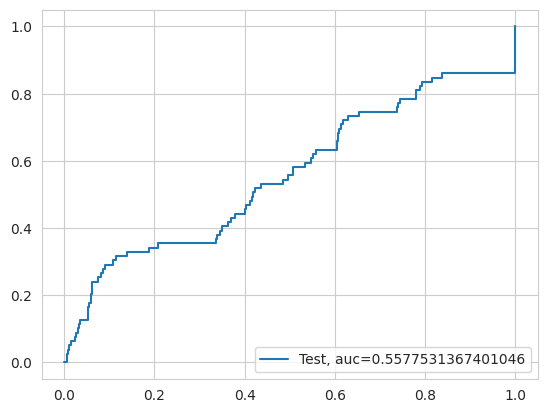

Time Taken by Model: --- 816.9663107395172 seconds ---


In [56]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
data_frame_Results = buildAndRunLogisticModels(data_frame_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
data_frame_Results = buildAndRunKNNModels(data_frame_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
data_frame_Results = buildAndRunTreeModels(data_frame_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
data_frame_Results = buildAndRunRandomForestModels(data_frame_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
data_frame_Results = buildAndRunXGBoostModels(data_frame_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
data_frame_Results = buildAndRunSVMModels(data_frame_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [57]:
data_frame_Results

Data_Imbalance_Handling  \
0                Power Transformer   
1                Power Transformer   
2                Power Transformer   
3                Power Transformer   
4                Power Transformer   
5                Power Transformer   
6                Power Transformer   
7                Power Transformer   
8   RepeatedKFold Cross Validation   
9   RepeatedKFold Cross Validation   
10  RepeatedKFold Cross Validation   
11  RepeatedKFold Cross Validation   
12  RepeatedKFold Cross Validation   
13  RepeatedKFold Cross Validation   
14  RepeatedKFold Cross Validation   
15  RepeatedKFold Cross Validation   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998999   0.966806   0.001289  
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
2                                          KNN  0.999298   0.900851   0.200000  
3                Tree Model with gini criteria  0.998806   0.859015   1.000000  
4             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999456   0.972998   0.000051  
7                                          SVM  0.998560   0.891314   0.001207  
8   Logistic Regression with L2 Regularisation  0.999210   0.982510   0.001910  
9   Logistic Regression with L1 Regularisation  0.999192   0.836889   0.050095  
10                                         KNN  0.999245   0.822542   0.200000  
11               Tree Model with gini criteria  0.999175   0.879501   1.000000  
12            Tree Model with entropy criteria  0.999386   0.885927   1.000000  
13                               Random Forest  0.999649   0.947480   0.010000  
14                                     XGBoost  0.999666   0.974926   0.000308  
15                                         SVM  0.998648   0.557753   0.001819

## It seems XGBOost with Repeated KFold cross validation has provided us wih best results with ROC_Value of 0.984352

In [58]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
ModelXGB = XGBClassifier(random_state=42)
ModelXGB.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(ModelXGB.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']


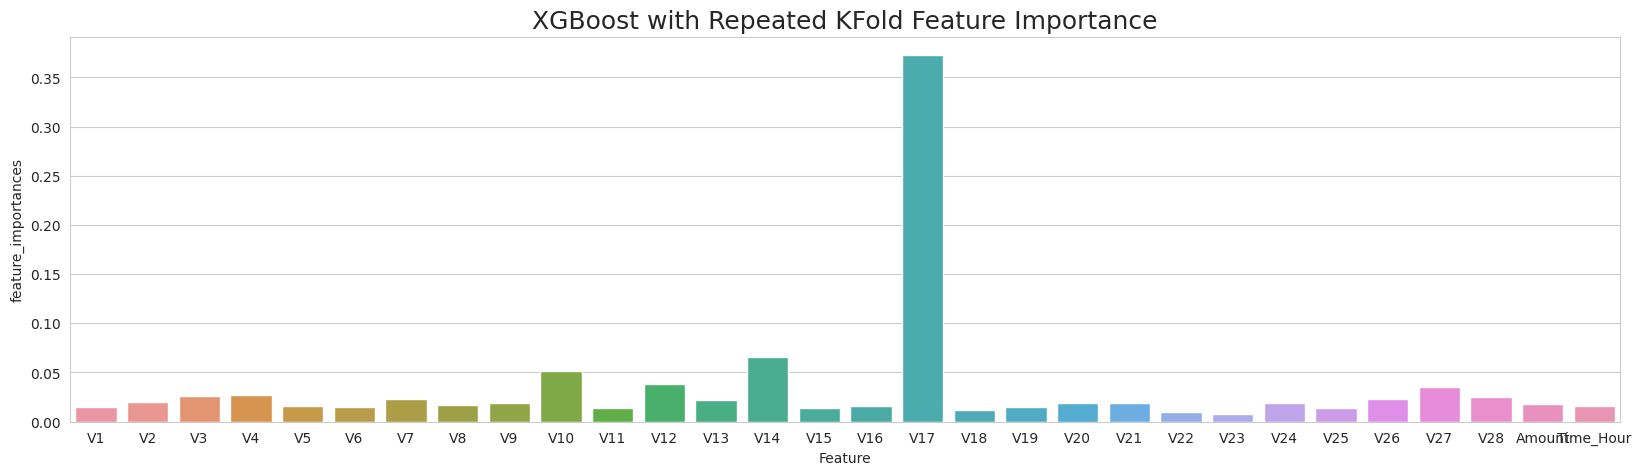

In [59]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

# Perform cross validation with StratifiedKFold

In [60]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9824998302436573
Max auc_roc for l1: 0.9652106893977332
Parameters for l2 regularisations
[[ 0.00683334  0.06145934 -0.06703104  0.21837008  0.05400372 -0.0319603
  -0.02280335 -0.1149601  -0.06954056 -0.16366435  0.12779    -0.19159896
  -0.03711445 -0.36059637  0.00364854 -0.08799108 -0.07288165 -0.0007583
   0.00394511 -0.0279599   0.03822224  0.02337054 -0.01173993 -0.00997821
  -0.00657592  0.00627513 -0.01025023 -0.00174467  0.00039791 -0.00096784]]
[-7.40641365]
{1: array([[0.69243733, 0.69420152, 0.71447107, 0.83768575, 0.95579612,
        0.97136042, 0.98915673, 0.99464431, 0.99129517, 0.99071237,
        0.99096601, 0.99096601, 0.99096601, 0.99096601, 0.99096601,
        0.99096601, 0.99096601, 0.99096601, 0.99096601, 0.99096601],
       [0.60700243, 0.60865586, 0.62914551, 0.76884136, 0.90900227,
        0.94879974, 0.9604112 , 0.98181412, 0.98547001, 0.98328227,
        0.97955152, 0.97955152, 0.9795515

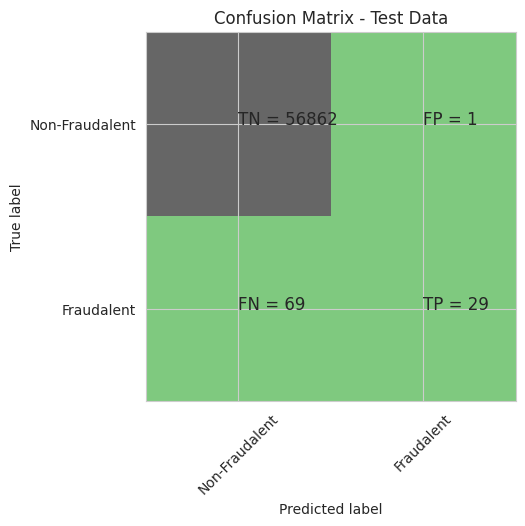

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9987535331191517
Confusion Matrix


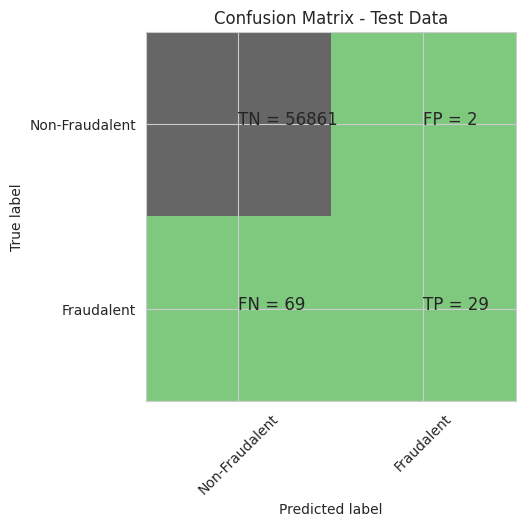

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9833866719401124
l2 threshold: 0.0015540600590433185
ROC for the test dataset 98.3%


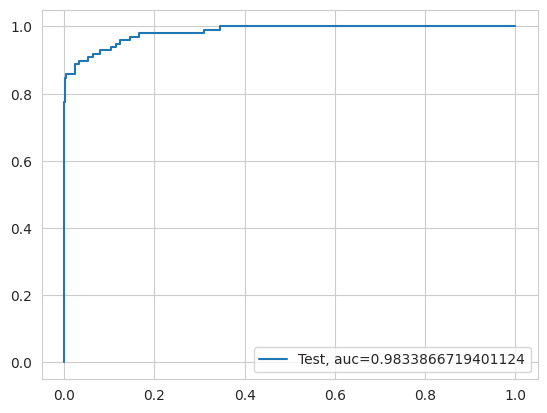

l1 roc_value: 0.8890758561483437
l1 threshold: 0.021087492766199863
ROC for the test dataset 88.9%


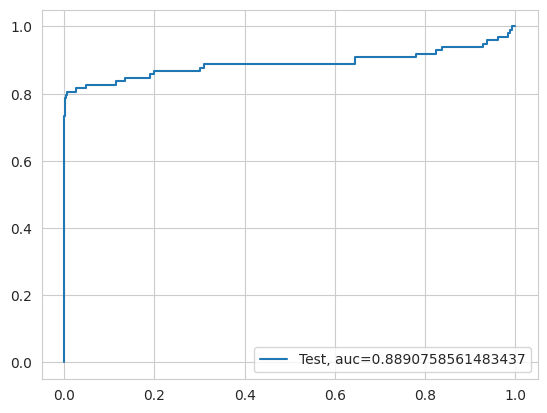

Time Taken by Model: --- 383.21873354911804 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9991924299081828
Confusion Matrix


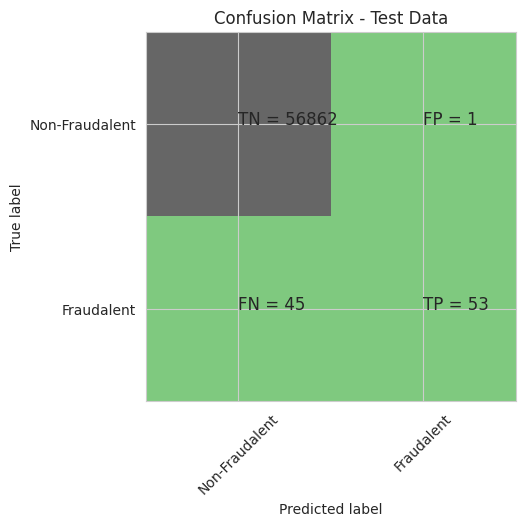

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset 80.6%


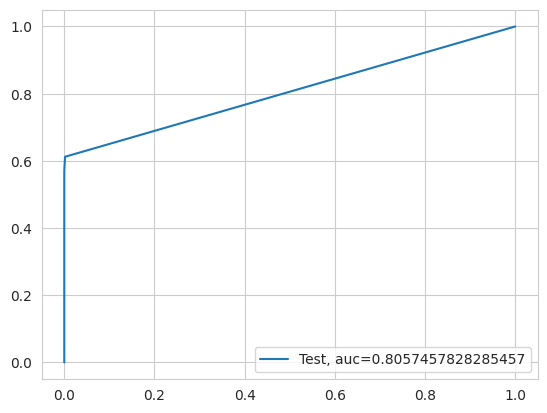

Time Taken by Model: --- 267.91240334510803 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.998841312476958
Confusion Matrix


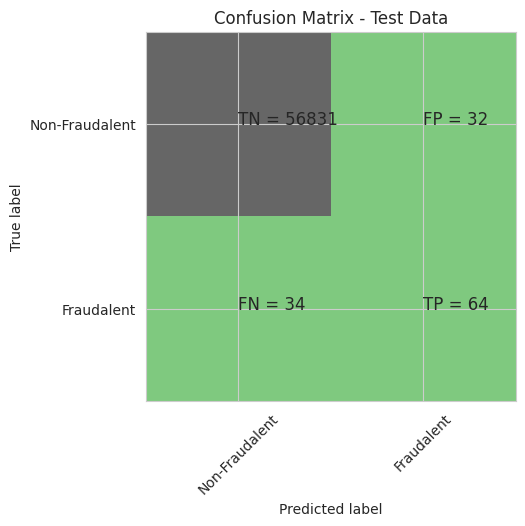

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset 82.6%


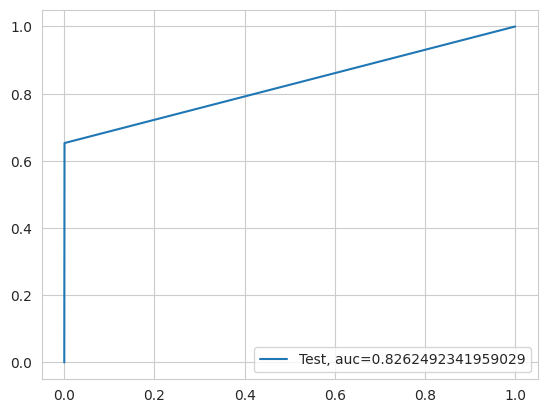

entropy score: 0.9990168711925703
Confusion Matrix


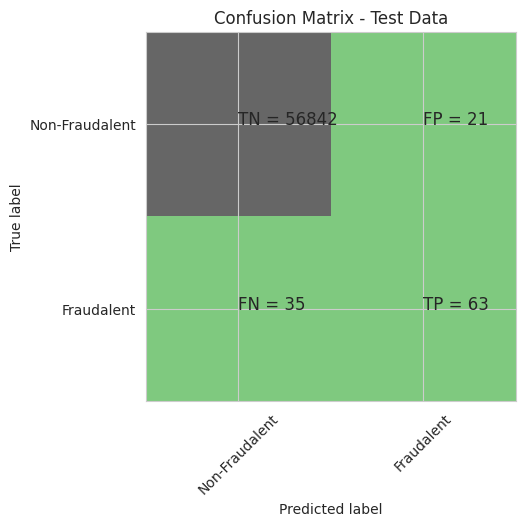

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212439170839185
Tree threshold: 1.0
ROC for the test dataset 82.1%


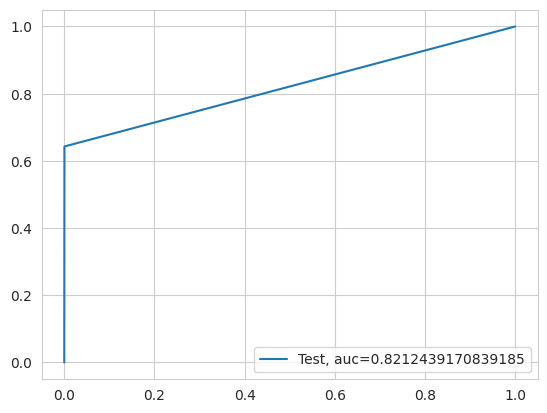

Time Taken by Model: --- 39.135167837142944 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


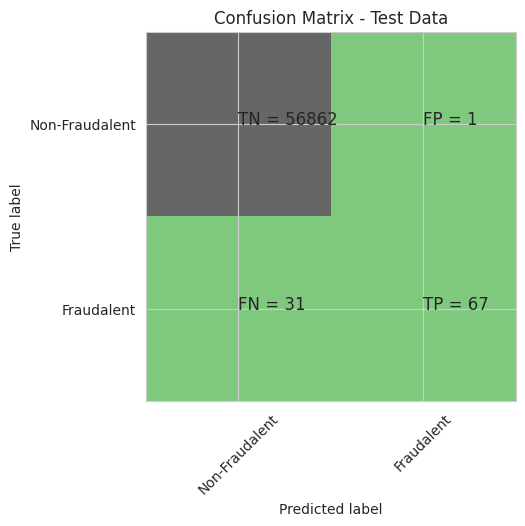

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


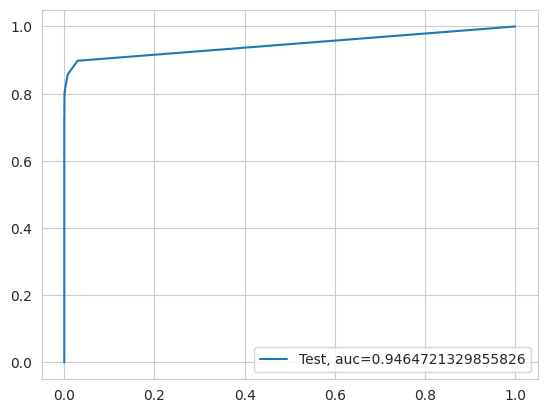

Time Taken by Model: --- 269.9877755641937 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


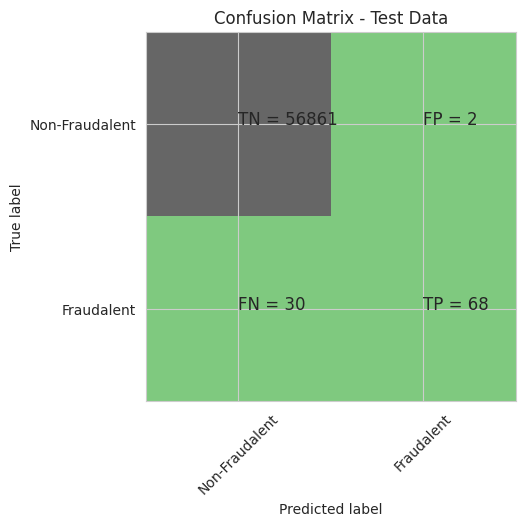

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9728125638170081
XGBoost threshold: 0.00010038274194812402
ROC for the test dataset 97.3%


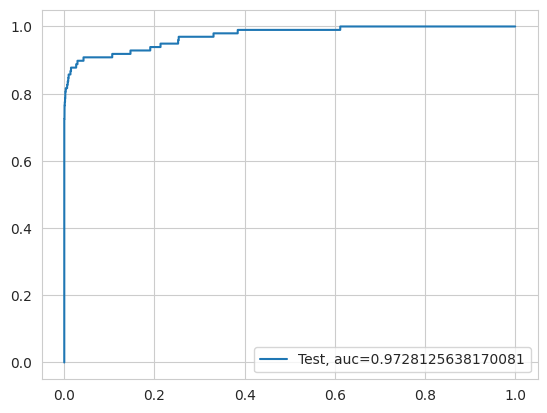

Time Taken by Model: --- 128.42696118354797 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9982795245869981
Confusion Matrix


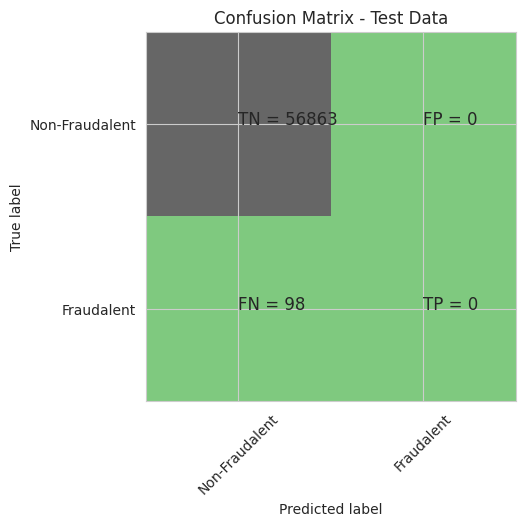

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40177034885494567
SVM threshold: 0.0043293540552463
ROC for the test dataset 40.2%


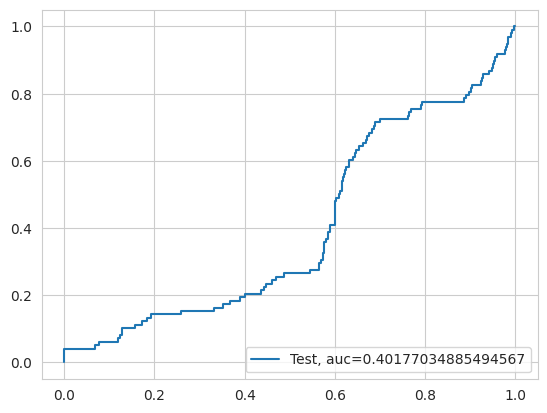

Time Taken by Model: --- 213.72023248672485 seconds ---


In [61]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
data_frame_Results = buildAndRunLogisticModels(data_frame_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
data_frame_Results = buildAndRunKNNModels(data_frame_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
data_frame_Results = buildAndRunTreeModels(data_frame_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
data_frame_Results = buildAndRunRandomForestModels(data_frame_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
data_frame_Results = buildAndRunXGBoostModels(data_frame_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
data_frame_Results = buildAndRunSVMModels(data_frame_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [62]:
data_frame_Results

Data_Imbalance_Handling  \
0                  Power Transformer   
1                  Power Transformer   
2                  Power Transformer   
3                  Power Transformer   
4                  Power Transformer   
5                  Power Transformer   
6                  Power Transformer   
7                  Power Transformer   
8     RepeatedKFold Cross Validation   
9     RepeatedKFold Cross Validation   
10    RepeatedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
12    RepeatedKFold Cross Validation   
13    RepeatedKFold Cross Validation   
14    RepeatedKFold Cross Validation   
15    RepeatedKFold Cross Validation   
16  StratifiedKFold Cross Validation   
17  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
23  StratifiedKFold Cross Validation   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998999   0.966806   0.001289  
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
2                                          KNN  0.999298   0.900851   0.200000  
3                Tree Model with gini criteria  0.998806   0.859015   1.000000  
4             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999456   0.972998   0.000051  
7                                          SVM  0.998560   0.891314   0.001207  
8   Logistic Regression with L2 Regularisation  0.999210   0.982510   0.001910  
9   Logistic Regression with L1 Regularisation  0.999192   0.836889   0.050095  
10                                         KNN  0.999245   0.822542   0.200000  
11               Tree Model with gini criteria  0.999175   0.879501   1.000000  
12            Tree Model with entropy criteria  0.999386   0.885927   1.000000  
13                               Random Forest  0.999649   0.947480   0.010000  
14                                     XGBoost  0.999666   0.974926   0.000308  
15                                         SVM  0.998648   0.557753   0.001819  
16  Logistic Regression with L2 Regularisation  0.998771   0.983387   0.001554  
17  Logistic Regression with L1 Regularisation  0.998754   0.889076   0.021087  
18                                         KNN  0.999192   0.805746   0.200000  
19               Tree Model with gini criteria  0.998841   0.826249   1.000000  
20            Tree Model with entropy criteria  0.999017   0.821244   1.000000  
21                               Random Forest  0.999438   0.946472   0.010000  
22                                     XGBoost  0.999438   0.972813   0.000100  
23                                         SVM  0.998280   0.401770   0.004329

**As the results show Logistic Regression with L2 Regularisation for Stratifiedata_frameold cross validation provided best results**



#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [63]:
  # Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))




Max auc_roc for l2: 0.9860090154859075
Parameters for l2 regularisations
[[ 2.05521697e-02  3.27781251e-02 -8.96418837e-02  2.38303781e-01
   8.29544078e-02 -4.90306838e-02 -3.31298330e-02 -1.08618972e-01
  -9.26227026e-02 -1.75814245e-01  1.35476148e-01 -2.08107916e-01
  -4.34601292e-02 -3.78906037e-01 -1.11277256e-02 -1.04749927e-01
  -1.14547781e-01 -8.46197269e-03  1.49924660e-02 -5.86832952e-03
   3.98067782e-02  2.46485199e-02  1.95769013e-03 -1.57941081e-02
  -7.89468053e-03  5.19309758e-03 -3.25547699e-03 -2.38372723e-04
   3.01546497e-04  4.46281588e-03]]
[-7.49995753]
{1: array([[0.58216478, 0.5843407 , 0.6102234 , 0.77826009, 0.94270322,
        0.98595298, 0.9960218 , 0.99404858, 0.99344538, 0.99411696,
        0.99291178, 0.99291178, 0.99291178, 0.99291178, 0.99291178,
        0.99291178, 0.99291178, 0.99291178, 0.99291178, 0.99291178],
       [0.56074717, 0.56248594, 0.57916782, 0.72043634, 0.88967776,
        0.93867238, 0.97542836, 0.97876629, 0.97972293, 0.98094072,
  

In [64]:
searchCV_l2.coef_

array([[ 2.05521697e-02,  3.27781251e-02, -8.96418837e-02,
         2.38303781e-01,  8.29544078e-02, -4.90306838e-02,
        -3.31298330e-02, -1.08618972e-01, -9.26227026e-02,
        -1.75814245e-01,  1.35476148e-01, -2.08107916e-01,
        -4.34601292e-02, -3.78906037e-01, -1.11277256e-02,
        -1.04749927e-01, -1.14547781e-01, -8.46197269e-03,
         1.49924660e-02, -5.86832952e-03,  3.98067782e-02,
         2.46485199e-02,  1.95769013e-03, -1.57941081e-02,
        -7.89468053e-03,  5.19309758e-03, -3.25547699e-03,
        -2.38372723e-04,  3.01546497e-04,  4.46281588e-03]])

In [65]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

In [66]:
coefficients

Feature  Importance Coefficient
0          V1                0.020552
1          V2                0.032778
2          V3               -0.089642
3          V4                0.238304
4          V5                0.082954
5          V6               -0.049031
6          V7               -0.033130
7          V8               -0.108619
8          V9               -0.092623
9         V10               -0.175814
10        V11                0.135476
11        V12               -0.208108
12        V13               -0.043460
13        V14               -0.378906
14        V15               -0.011128
15        V16               -0.104750
16        V17               -0.114548
17        V18               -0.008462
18        V19                0.014992
19        V20               -0.005868
20        V21                0.039807
21        V22                0.024649
22        V23                0.001958
23        V24               -0.015794
24        V25               -0.007895
25        V26                0.005193
26        V27               -0.003255
27        V28               -0.000238
28     Amount                0.000302
29  Time_Hour                0.004463

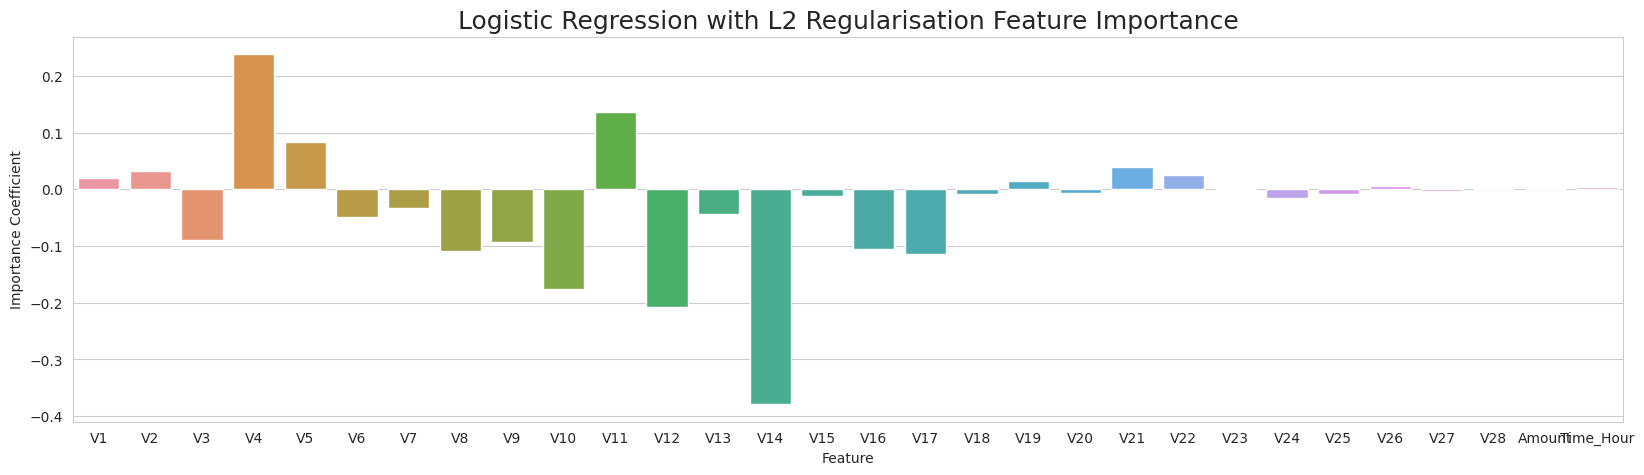

In [67]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()



**Its is evident that V4, V11, v5 has + ve imporatnce whereas V14, V12, V10 seems to have -ve impact on the predictaions**

#As the models Oversampling data, take significantly longer time to run.
We will try with undersampling methods

In [68]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler
#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9837975455487692
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[-8.10091955e-02 -6.16790908e-02 -2.50244980e-01  6.70054314e-01
  -1.38283463e-02 -1.04674897e-01  9.03861238e-02 -2.56155025e-01
  -1.52669860e-01 -2.54094915e-01  1.82808642e-01 -3.67788714e-01
  -2.27327145e-01 -6.89287881e-01  2.94258615e-02 -1.48598453e-01
  -3.20276399e-02  3.25489732e-02 -6.09713494e-02 -1.74425637e-01
   7.89903977e-04  1.66223198e-01  1.30956604e-01 -1.52023576e-01
  -8.61661658e-03 -1.00824337e-01  9.47570857e-02 -5.45740396e-02
   5.69444385e-04 -4.75834556e-02]]
[-2.6701802]
{1: array([[0.5349359 , 0.5349359 , 0.54423077, 0.59679487, 0.76730769,
        0.9125    , 0.96634615, 0.98301282, 0.98365385, 0.98589744,
        0.98589744, 0.98589744, 0.98589744, 0.98589744, 0.98589744,
        0.98589744, 0.98589744, 0.98589744, 0.98589744, 0.98589744],
       [0.4100065 , 0.4100065 , 0.41585445, 0.45646524, 0.6455490

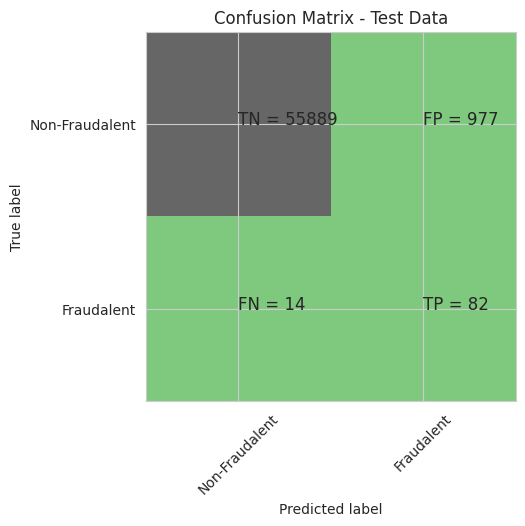

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.08      0.85      0.14        96

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962

Accuarcy of Logistic model with l1 regularisation : 0.9983146659176293
Confusion Matrix


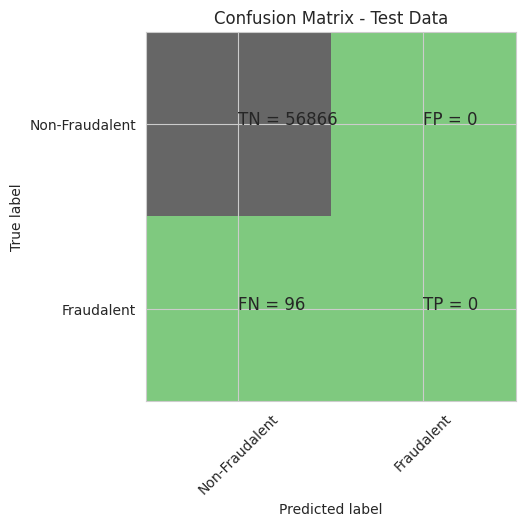

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9631302462514214
l2 threshold: 0.25803410862383236
ROC for the test dataset 96.3%


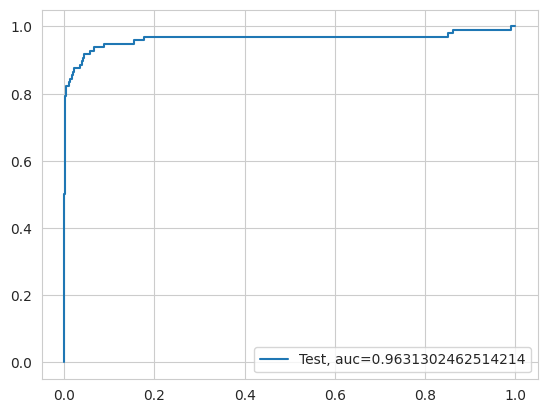

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


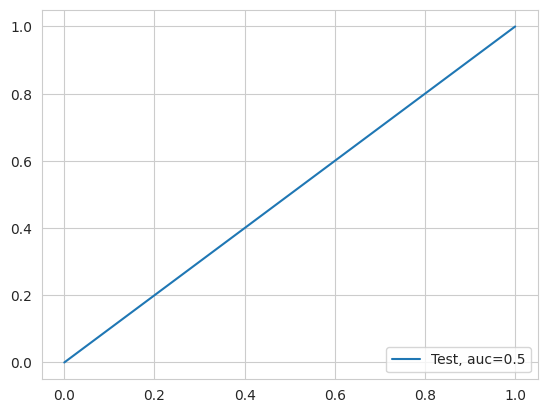

Time Taken by Model: --- 4.012717008590698 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9730522102454268
Confusion Matrix


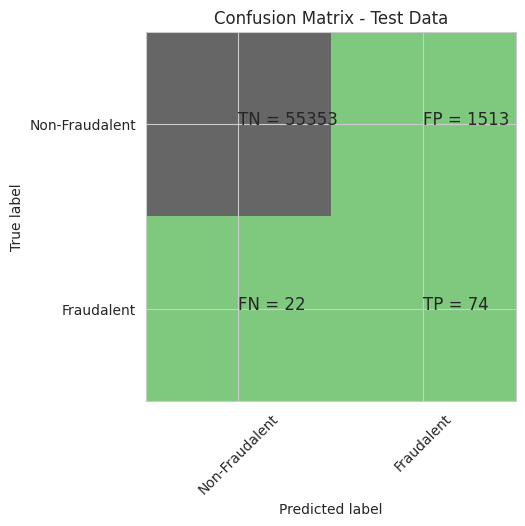

classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.05      0.77      0.09        96

    accuracy                           0.97     56962
   macro avg       0.52      0.87      0.54     56962
weighted avg       1.00      0.97      0.98     56962

KNN roc_value: 0.9409072241468248
KNN threshold: 0.4
ROC for the test dataset 94.1%


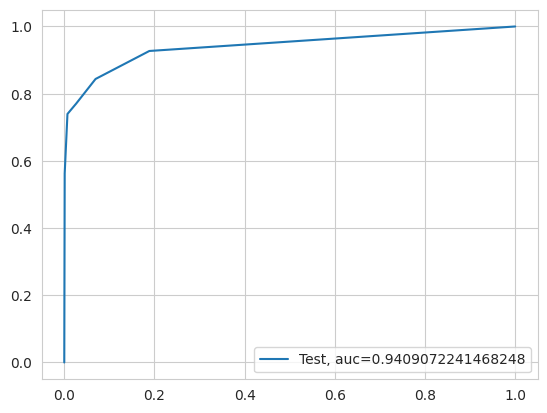

Time Taken by Model: --- 5.046542644500732 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9392577507812225
Confusion Matrix


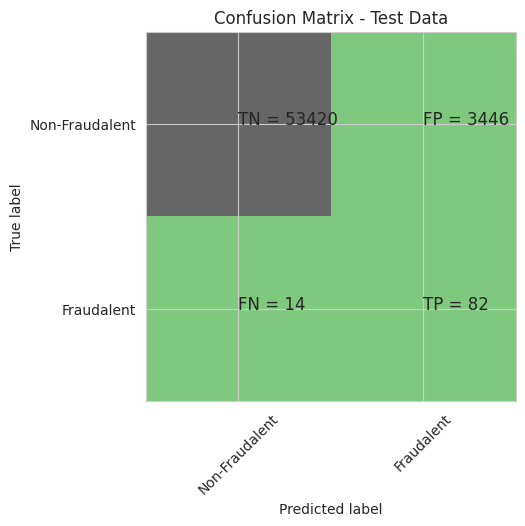

classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56866
           1       0.02      0.85      0.05        96

    accuracy                           0.94     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.94      0.97     56962

gini tree_roc_value: 0.896784033224305
Tree threshold: 1.0
ROC for the test dataset 89.7%


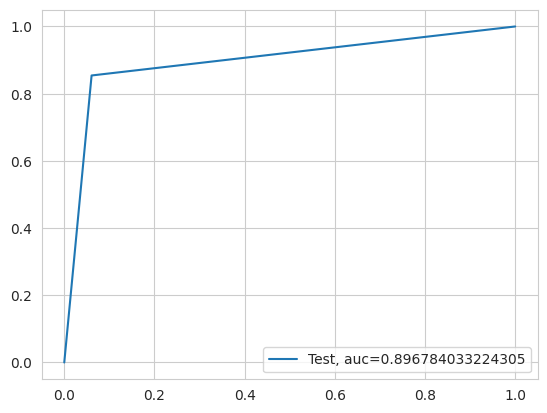

entropy score: 0.9362381938836417
Confusion Matrix


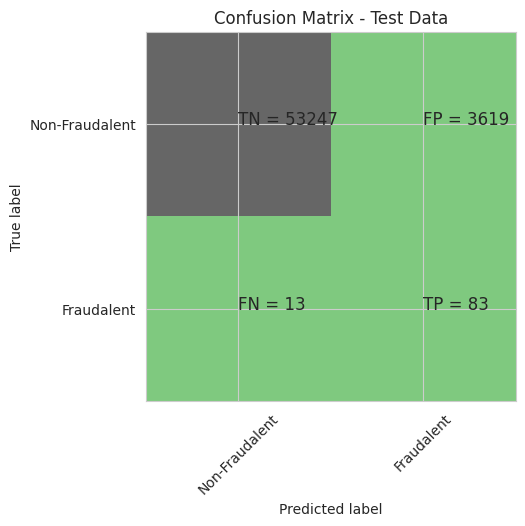

classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56866
           1       0.02      0.86      0.04        96

    accuracy                           0.94     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.94      0.97     56962

entropy tree_roc_value: 0.9004712467320837
Tree threshold: 1.0
ROC for the test dataset 90.0%


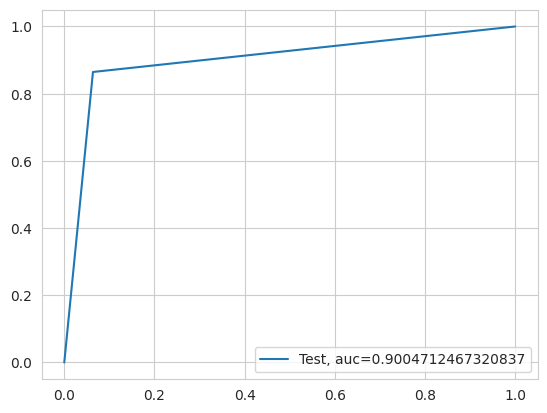

Time Taken by Model: --- 1.2491626739501953 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9873951055089358
Confusion Matrix


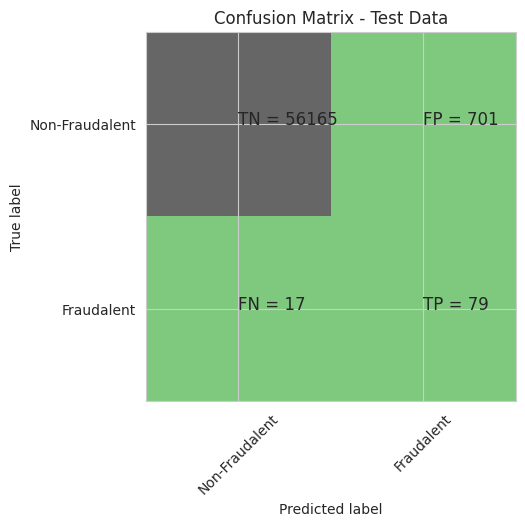

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.10      0.82      0.18        96

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.59     56962
weighted avg       1.00      0.99      0.99     56962

Random Forest roc_value: 0.975043028786973
Random Forest threshold: 0.32
ROC for the test dataset 97.5%


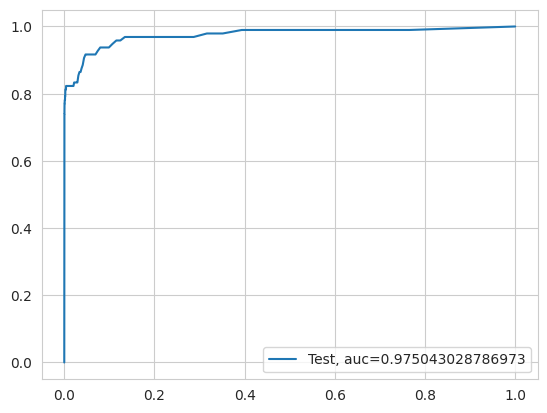

Time Taken by Model: --- 3.1133310794830322 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.980671324742811
Confusion Matrix


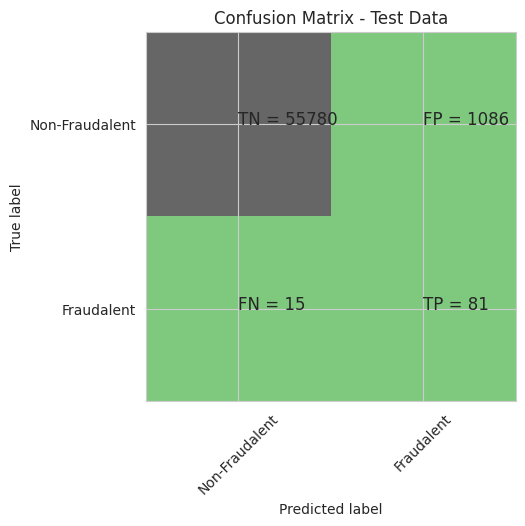

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.84      0.13        96

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.56     56962
weighted avg       1.00      0.98      0.99     56962

XGboost roc_value: 0.9775645816480849
XGBoost threshold: 0.05114094913005829
ROC for the test dataset 97.8%


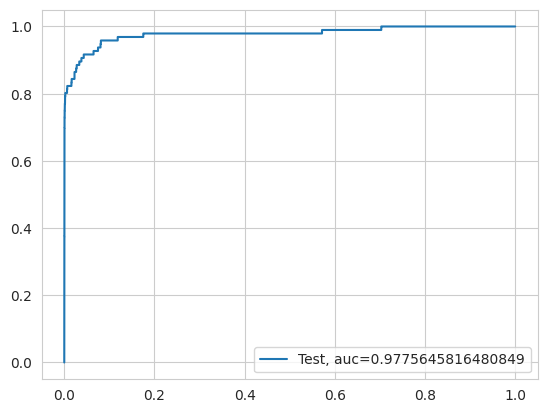

Time Taken by Model: --- 1.2721059322357178 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.6423580632702504
Confusion Matrix


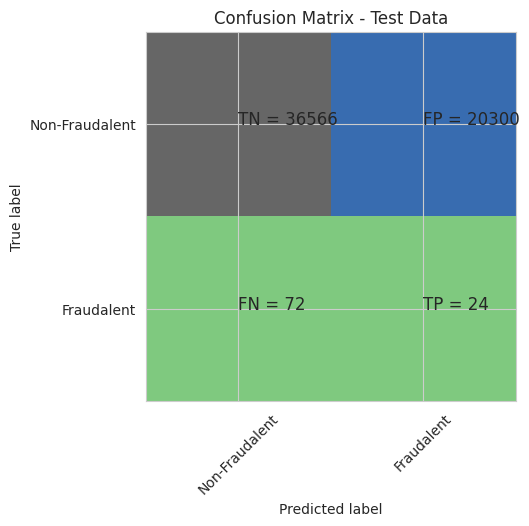

classification Report
              precision    recall  f1-score   support

           0       1.00      0.64      0.78     56866
           1       0.00      0.25      0.00        96

    accuracy                           0.64     56962
   macro avg       0.50      0.45      0.39     56962
weighted avg       1.00      0.64      0.78     56962

SVM roc_value: 0.451354939682763
SVM threshold: 0.38170217429968323
ROC for the test dataset 45.1%


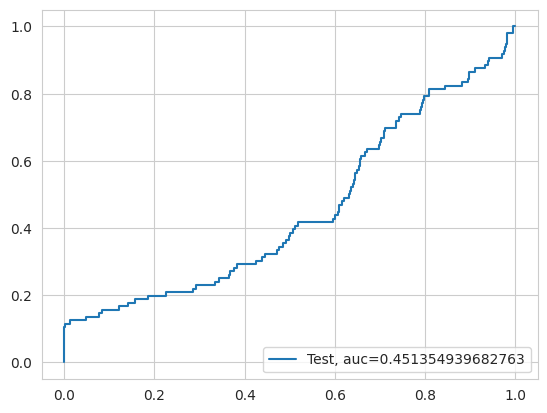

Time Taken by Model: --- 8.923403024673462 seconds ---


In [69]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
data_frame_Results = buildAndRunLogisticModels(data_frame_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
data_frame_Results = buildAndRunKNNModels(data_frame_Results,"Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
data_frame_Results = buildAndRunTreeModels(data_frame_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
data_frame_Results = buildAndRunRandomForestModels(data_frame_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
data_frame_Results = buildAndRunXGBoostModels(data_frame_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
data_frame_Results = buildAndRunSVMModels(data_frame_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [70]:
data_frame_Results

Data_Imbalance_Handling  \
0                  Power Transformer   
1                  Power Transformer   
2                  Power Transformer   
3                  Power Transformer   
4                  Power Transformer   
5                  Power Transformer   
6                  Power Transformer   
7                  Power Transformer   
8     RepeatedKFold Cross Validation   
9     RepeatedKFold Cross Validation   
10    RepeatedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
12    RepeatedKFold Cross Validation   
13    RepeatedKFold Cross Validation   
14    RepeatedKFold Cross Validation   
15    RepeatedKFold Cross Validation   
16  StratifiedKFold Cross Validation   
17  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
23  StratifiedKFold Cross Validation   
24              Random Undersampling   
25              Random Undersampling   
26              Random Undersampling   
27              Random Undersampling   
28              Random Undersampling   
29              Random Undersampling   
30              Random Undersampling   
31              Random Undersampling   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998999   0.966806   0.001289  
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
2                                          KNN  0.999298   0.900851   0.200000  
3                Tree Model with gini criteria  0.998806   0.859015   1.000000  
4             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999456   0.972998   0.000051  
7                                          SVM  0.998560   0.891314   0.001207  
8   Logistic Regression with L2 Regularisation  0.999210   0.982510   0.001910  
9   Logistic Regression with L1 Regularisation  0.999192   0.836889   0.050095  
10                                         KNN  0.999245   0.822542   0.200000  
11               Tree Model with gini criteria  0.999175   0.879501   1.000000  
12            Tree Model with entropy criteria  0.999386   0.885927   1.000000  
13                               Random Forest  0.999649   0.947480   0.010000  
14                                     XGBoost  0.999666   0.974926   0.000308  
15                                         SVM  0.998648   0.557753   0.001819  
16  Logistic Regression with L2 Regularisation  0.998771   0.983387   0.001554  
17  Logistic Regression with L1 Regularisation  0.998754   0.889076   0.021087  
18                                         KNN  0.999192   0.805746   0.200000  
19               Tree Model with gini criteria  0.998841   0.826249   1.000000  
20            Tree Model with entropy criteria  0.999017   0.821244   1.000000  
21                               Random Forest  0.999438   0.946472   0.010000  
22                                     XGBoost  0.999438   0.972813   0.000100  
23                                         SVM  0.998280   0.401770   0.004329  
24  Logistic Regression with L2 Regularisation  0.982602   0.963130   0.258034  
25  Logistic Regression with L1 Regularisation  0.998315   0.500000   1.500000  
26                                         KNN  0.973052   0.940907   0.400000  
27               Tree Model with gini criteria  0.939258   0.896784   1.000000  
28            Tree Model with entropy criteria  0.936238   0.900471   1.000000  
29                               Random Forest  0.987395   0.975043   0.320000  
30                                     XGBoost  0.980671   0.977565   0.051141  
31                                         SVM  0.642358   0.451355   0.381702

**It seems Undersampling has impoved the XGBoost Results**

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

# Oversampling with RandomOverSampler and StratifiedKFold Cross Validation

**We will use Random Oversampling method to handle the class imbalance**

1. First we will display class distibution with and without the Random Oversampling.

2. Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L2 Regularisation
2. Logistic Regression with L1 Regularisation	
3. KNN
4. Decision tree model with Gini criteria
5. Decision tree model with Entropy criteria
6. Random Forest
7. XGBoost

3. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

4. Once we get results for above model, we will compare the results and select model which provided best results for the Random oversampling techinique

In [71]:

from imblearn.over_sampling import RandomOverSampler
#Define Oversampler
ROS = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = ROS.fit_resample(X_train, y_train)


In [72]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

In [ ]:
Data_Imbalance_Handling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
data_frame_Results = buildAndRunLogisticModels(data_frame_Results , Data_Imbalance_Handling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
data_frame_Results = buildAndRunKNNModels(data_frame_Results , Data_Imbalance_Handling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
data_frame_Results = buildAndRunTreeModels(data_frame_Results , Data_Imbalance_Handling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
data_frame_Results = buildAndRunRandomForestModels(data_frame_Results , Data_Imbalance_Handling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
data_frame_Results = buildAndRunXGBoostModels(data_frame_Results , Data_Imbalance_Handling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#data_frame_Results = buildAndRunSVMModels(data_frame_Results , Data_Imbalance_Handling,X_over, y_over, X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Logistic Regression with L1 And L2 Regularisation


In [ ]:
data_frame_Results

## Results for Random Oversampling: 

**Random Oversampling seems to have +ve change in prediction for XGBoost**
Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

# Oversampling with  SMOTE Oversamplng

**We will use SMOTE Oversampling method to handle the class imbalance**

1. First we will display class distibution with and without the SMOTE Oversampling.

2. Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L2 Regularisation
2. Logistic Regression with L1 Regularisation	
3. KNN
4. Decision tree model with Gini criteria
5. Decision tree model with Entropy criteria
6. Random Forest
7. XGBoost

3. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

4. Once we get results for above model, we will compare the results and select model which provided best results for the SMOTE oversampling techinique

### Print the class distribution after applying SMOTE 

In [ ]:
# import warnings
# warnings.filterwarnings("ignore")

# from imblearn import over_sampling
# SMOTE = over_sampling.SMOTE(random_state=0)

# X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train) 

# #Create dataframe
# #X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)
# # Artificial minority samples and corresponding minority labels from SMOTE are appended
# # below X_train and y_train respectively
# # So to exclusively get the artificial minority samples from SMOTE, we do
# X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

# X_train_class1 = X_train.to_numpy()[np.where(y_train==1.0)]
# X_train_class0 = X_train.to_numpy()[np.where(y_train==0.0)]


# plt.rcParams['figure.figsize'] = [20, 20]
# fig = plt.figure()

# plt.subplot(3, 1, 1)
# plt.scatter(X_train_class1[:, 0], X_train_class1[:, 1], label='Actual Class-1 Examples')
# plt.legend()

# plt.subplot(3, 1, 2)
# plt.scatter(X_train_class1[:, 0], X_train_class1[:, 1], label='Actual Class-1 Examples')
# plt.scatter(X_train_smote_1[:X_train_class1.shape[0], 0], X_train_smote_1[:X_train_class1.shape[0], 1],
#             label='Artificial SMOTE Class-1 Examples')
# plt.legend()

# plt.subplot(3, 1, 3)
# plt.scatter(X_train_class1[:, 0], X_train_class1[:, 1], label='Actual Class-1 Examples')
# plt.scatter(X_train_class0[:X_train_class1.shape[0], 0], X_train_class0[:X_train_class1.shape[0], 1], label='Actual Class-0 Examples')
# plt.legend()


# #Create dataframe
# X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9930151908600335
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.77250717  0.70922917  0.68870062  0.9386533   0.49654908 -0.93763709
  -0.69646179 -0.50711057 -0.4230197  -0.92054632  0.61728754 -1.25021754
  -0.23816749 -1.52802351  0.12539892 -0.78227643 -0.84372509 -0.43395297
   0.22142958 -1.08326073 -0.02347838  0.56559111  0.40484273 -0.91729951
   0.50599915  0.03415568 -0.1810893   0.84940107  0.00903448  0.01105878]]
[-5.30100402]
{1: array([[0.64927751, 0.78559745, 0.91748425, 0.96520455, 0.98466299,
        0.98956394, 0.99069921, 0.99160614, 0.99195638, 0.99205489,
        0.99207139, 0.99207139, 0.99207139, 0.99207139, 0.99207139,
        0.99207139, 0.99207139, 0.99207139, 0.99207139, 0.99207139],
       [0.6460276 , 0.7845671 , 0.91904908, 0.96766049, 0.98636753,
        0.99079354, 0.99182711, 0.99273092, 0.99311457, 0.99320849,
        0.99322173, 0.99322173, 0.99322173, 0.99322173

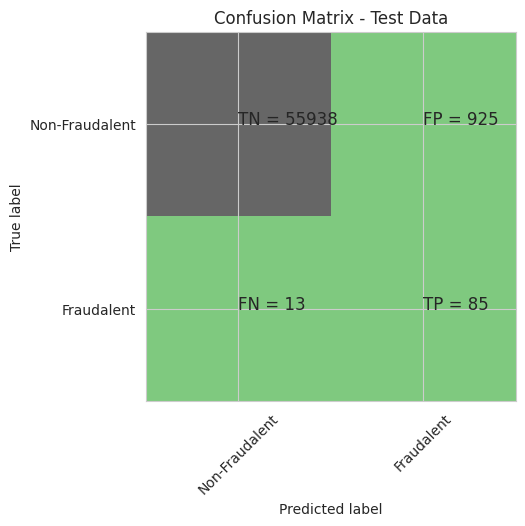

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.87      0.15        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


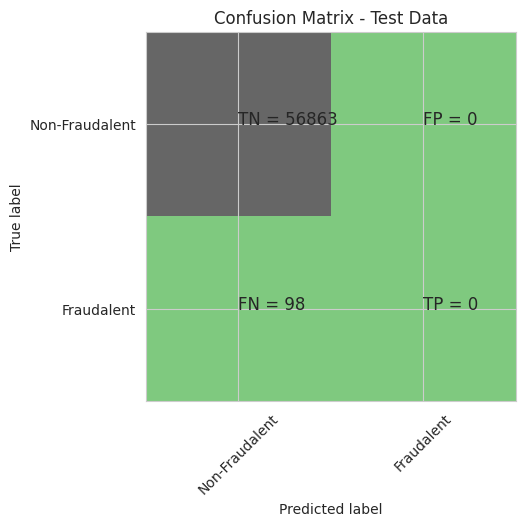

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9745828408918391
l2 threshold: 0.3939516300872773
ROC for the test dataset 97.5%


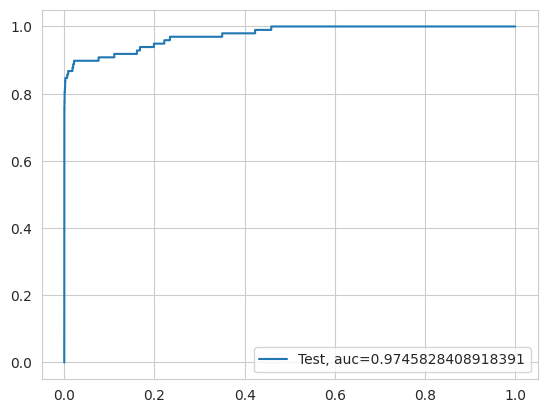

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


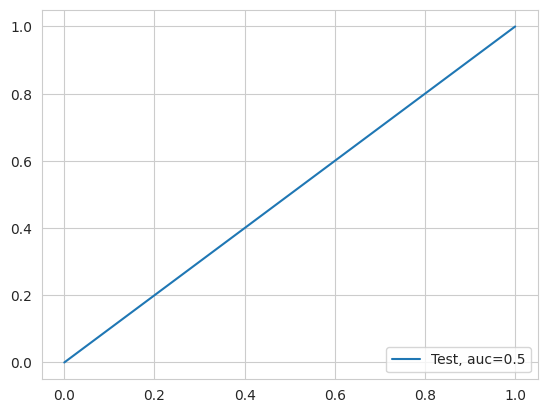

Time Taken by Model: --- 715.7303183078766 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9946805709169432
Confusion Matrix


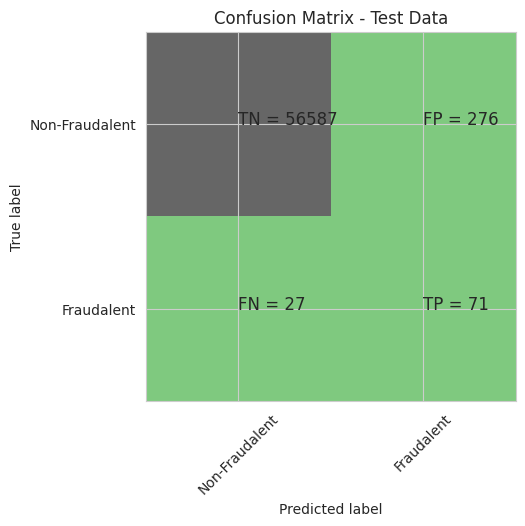

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8602674455287628
KNN threshold: 0.6
ROC for the test dataset 86.0%


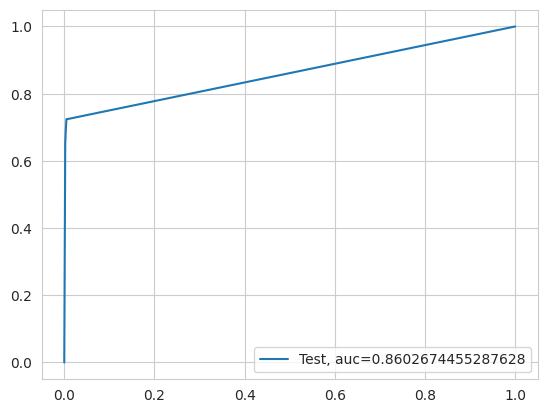

Time Taken by Model: --- 510.01482605934143 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9977528484401608
Confusion Matrix


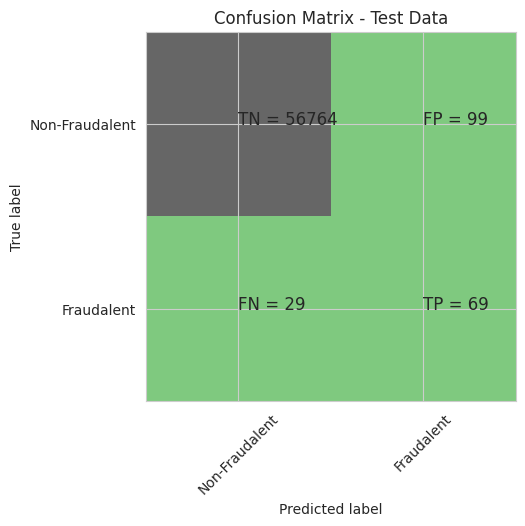

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8511703029874526
Tree threshold: 1.0
ROC for the test dataset 85.1%


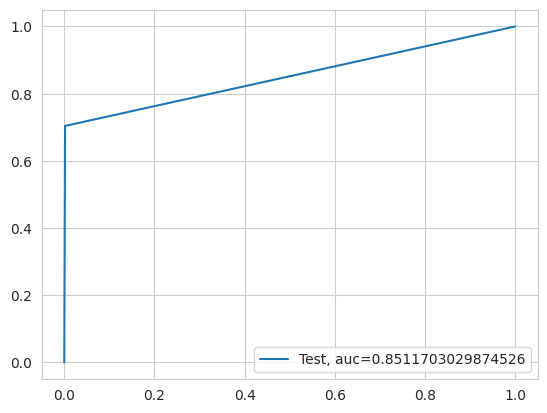

entropy score: 0.9969803900914661
Confusion Matrix


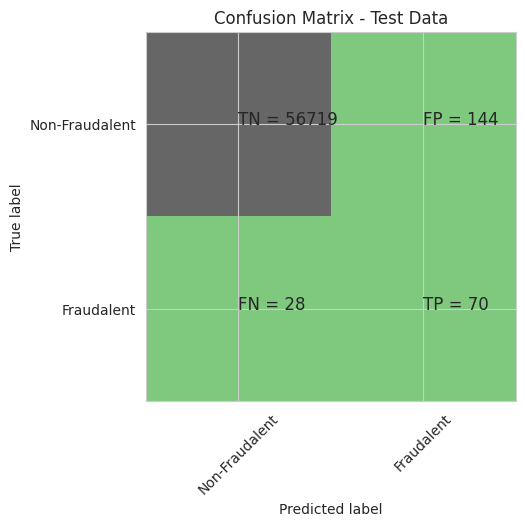

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.71      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.86      0.72     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8558766559223799
Tree threshold: 1.0
ROC for the test dataset 85.6%


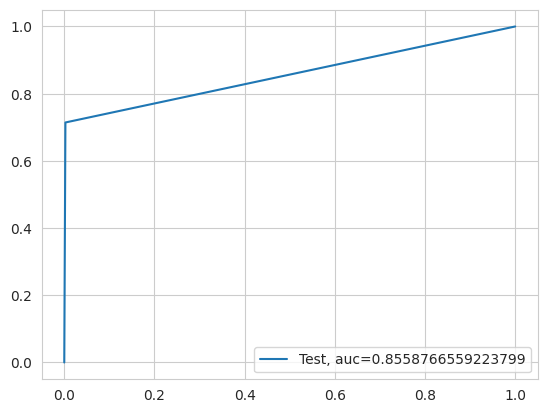

Time Taken by Model: --- 92.89852547645569 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


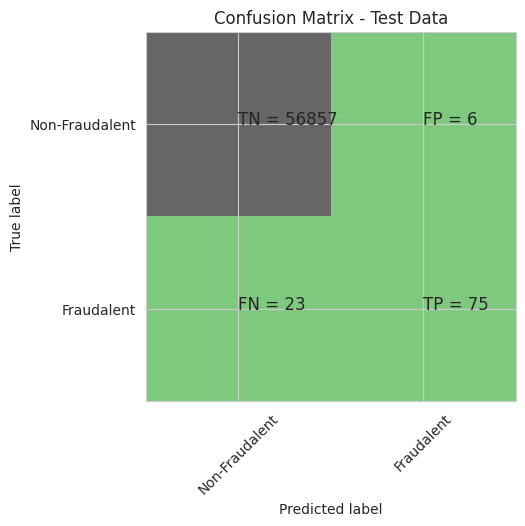

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9614705879186172
Random Forest threshold: 0.05
ROC for the test dataset 96.1%


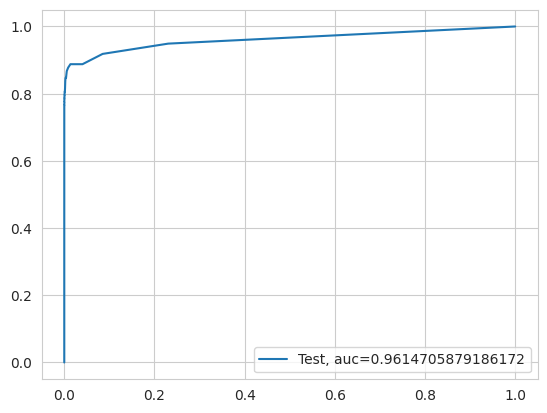

Time Taken by Model: --- 480.6217007637024 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


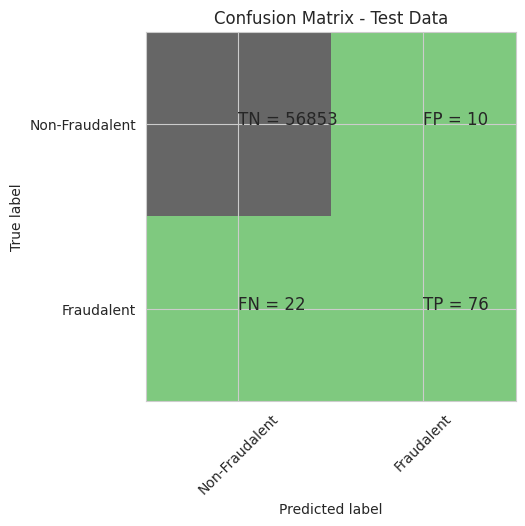

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.88      0.78      0.83        98

    accuracy                           1.00     56961
   macro avg       0.94      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.974152698555461
XGBoost threshold: 0.00022058551257941872
ROC for the test dataset 97.4%


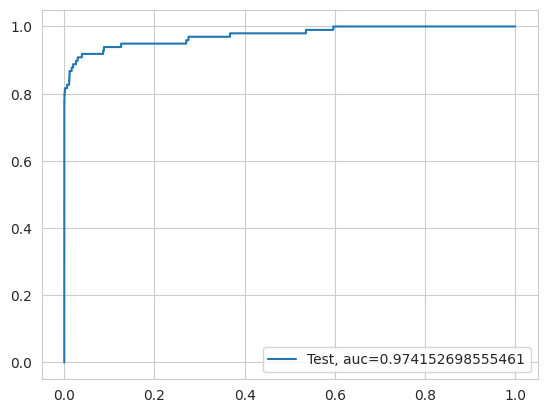

Time Taken by Model: --- 321.3834083080292 seconds ---
--------------------------------------------------------------------------------


In [77]:
Data_Imbalance_Handling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
data_frame_Results = buildAndRunLogisticModels(data_frame_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
data_frame_Results = buildAndRunKNNModels(data_frame_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
data_frame_Results = buildAndRunTreeModels(data_frame_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
data_frame_Results = buildAndRunRandomForestModels(data_frame_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
data_frame_Results = buildAndRunXGBoostModels(data_frame_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#data_frame_Results = buildAndRunSVMModels(data_frame_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

##### Build models on other algorithms to see the better performing on SMOTE

In [78]:
data_frame_Results

Data_Imbalance_Handling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                 RepeatedKFold Cross Validation   
9                 RepeatedKFold Cross Validation   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16              StratifiedKFold Cross Validation   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21              StratifiedKFold Cross Validation   
22              StratifiedKFold Cross Validation   
23              StratifiedKFold Cross Validation   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28                          Random Undersampling   
29                          Random Undersampling   
30                          Random Undersampling   
31                          Random Undersampling   
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34  Random Oversampling with StratifiedKFold CV    
35  Random Oversampling with StratifiedKFold CV    
36  Random Oversampling with StratifiedKFold CV    
37  Random Oversampling with StratifiedKFold CV    
38  Random Oversampling with StratifiedKFold CV    
39   SMOTE Oversampling with StratifiedKFold CV    
40   SMOTE Oversampling with StratifiedKFold CV    
41   SMOTE Oversampling with StratifiedKFold CV    
42   SMOTE Oversampling with StratifiedKFold CV    
43   SMOTE Oversampling with StratifiedKFold CV    
44   SMOTE Oversampling with StratifiedKFold CV    
45   SMOTE Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998999   0.966806   0.001289  
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
2                                          KNN  0.999298   0.900851   0.200000  
3                Tree Model with gini criteria  0.998806   0.859015   1.000000  
4             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999456   0.972998   0.000051  
7                                          SVM  0.998560   0.891314   0.001207  
8   Logistic Regression with L2 Regularisation  0.999210   0.982510   0.001910  
9   Logistic Regression with L1 Regularisation  0.999192   0.836889   0.050095  
10                                         KNN  0.999245   0.822542   0.200000  
11               Tree Model with gini criteria  0.999175   0.879501   1.000000  
12            Tree Model with entropy criteria  0.999386   0.885927   1.000000  
13                               Random Forest  0.999649   0.947480   0.010000  
14                                     XGBoost  0.999666   0.974926   0.000308  
15                                         SVM  0.998648   0.557753   0.001819  
16  Logistic Regression with L2 Regularisation  0.998771   0.983387   0.001554  
17  Logistic Regression with L1 Regularisation  0.998754   0.889076   0.021087  
18                                       

## Results for SMOTE Oversampling: 

Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

# Oversampling with ADASYN Oversampling

**To handle the class imbalance, we will be using the ADASYN Oversampling method. Firstly, we will display the class distribution with and without ADASYN Oversampling. Then, we will generate Train and Test datasets using the oversampled data with StratifiedKFold cross-validation method.

We will feed the train and test datasets into the following models:

Logistic Regression with L2 Regularization
Logistic Regression with L1 Regularization
KNN
Decision Tree model with Gini criteria
Decision Tree model with Entropy criteria
Random Forest
XGBoost
We have not used the SVM model due to its extensive processing power requirements. After obtaining the results for the above models, we will compare them and select the model which provides the best results for the oversampling technique


In [79]:
# import warnings
# warnings.filterwarnings("ignore")

# from imblearn import over_sampling

# ADASYN = over_sampling.ADASYN(random_state=0)
# X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train) 


# X_train_adasyn_1 = X_train_ADASYN[X_train.shape[0]:]

# X_train_class1 = X_train.to_numpy()[np.where(y_train==1.0)]
# X_train_class0 = X_train.to_numpy()[np.where(y_train==0.0)]


# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams['figure.figsize'] = [20, 20]
# fig = plt.figure()

# plt.subplot(3, 1, 1)
# plt.scatter(X_train_class1[:, 0], X_train_class1[:, 1], label='Actual Class-1 Examples')
# plt.legend()

# plt.subplot(3, 1, 2)
# plt.scatter(X_train_class1[:, 0], X_train_class1[:, 1], label='Actual Class-1 Examples')
# plt.scatter(X_train_adasyn_1[:X_train_class1.shape[0], 0], X_train_adasyn_1[:X_train_class1.shape[0], 1],
#             label='Artificial ADASYN Class-1 Examples')
# plt.legend()

# plt.subplot(3, 1, 3)
# plt.scatter(X_train_class1[:, 0], X_train_class1[:, 1], label='Actual Class-1 Examples')
# plt.scatter(X_train_class0[:X_train_class1.shape[0], 0], X_train_class0[:X_train_class1.shape[0], 1], label='Actual Class-0 Examples')
# plt.legend()



In [80]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling
ADASYN = over_sampling.ADASYN(random_state=0)

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

##### Build models on other algorithms to see the better performing on ADASYN

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9835137791366966
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.99402122  1.06020753  0.87027131  0.95034628  0.76778972 -1.20194104
  -0.94695313 -0.58402748 -0.36285745 -0.88785534  0.79266932 -1.4532049
  -0.16504877 -1.99242122  0.14401854 -1.00139473 -1.14710889 -0.5295751
   0.38474625 -1.41793068 -0.20529939  0.71924009  0.65857401 -1.11433656
   0.71569949  0.20912597  0.14873634  1.32846907  0.01286602  0.02230643]]
[-5.11916237]
{1: array([[0.610404  , 0.63191849, 0.72150467, 0.87081578, 0.95798817,
        0.97416661, 0.97844939, 0.98148389, 0.98277327, 0.98315642,
        0.98321665, 0.98321831, 0.98321831, 0.98321831, 0.98321831,
        0.98321831, 0.98321831, 0.98321831, 0.98321831, 0.98321831],
       [0.61072194, 0.63192858, 0.72000917, 0.86805623, 0.95677094,
        0.9739103 , 0.97856566, 0.98179908, 0.98313262, 0.98350137,
        0.98355597, 0.98355597, 0.98355597, 0.98355597, 

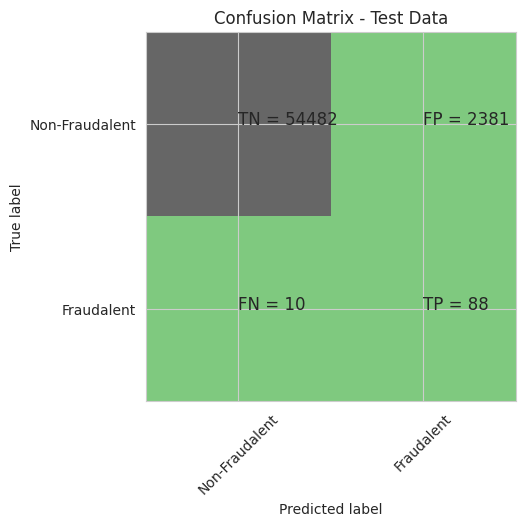

classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.52     56961
weighted avg       1.00      0.96      0.98     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


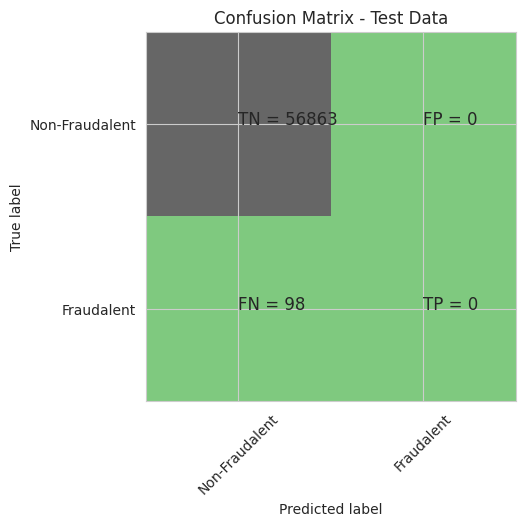

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9740284292321646
l2 threshold: 0.6115468403459997
ROC for the test dataset 97.4%


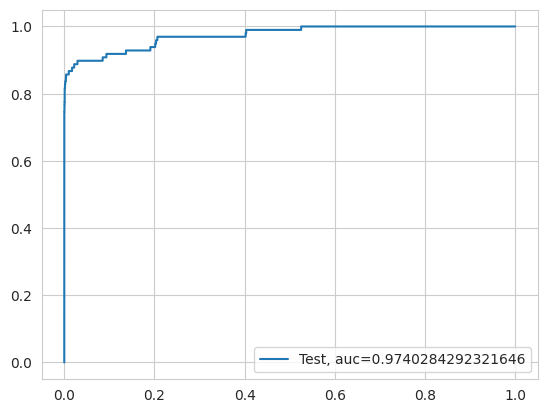

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


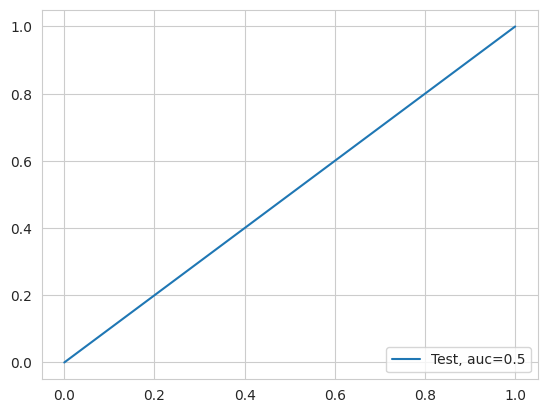

Time Taken by Model: --- 702.2958509922028 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9945050122013307
Confusion Matrix


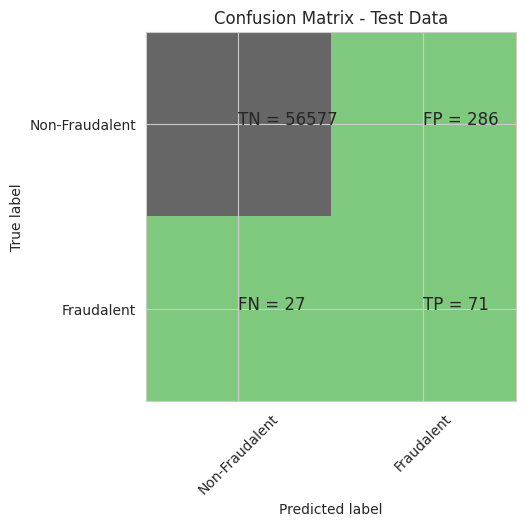

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.72      0.31        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8601937811862167
KNN threshold: 0.6
ROC for the test dataset 86.0%


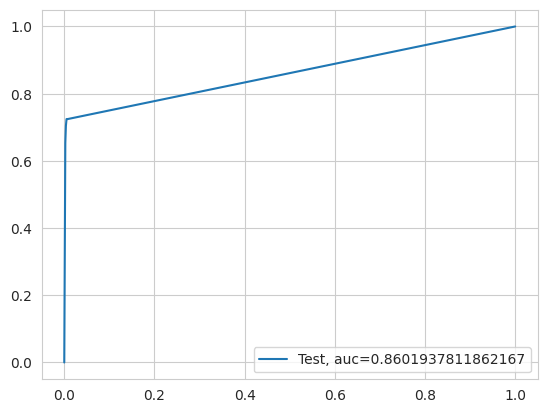

Time Taken by Model: --- 506.45064520835876 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria


In [ ]:
Data_Imbalance_Handling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
data_frame_Results = buildAndRunLogisticModels(data_frame_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
data_frame_Results = buildAndRunKNNModels(data_frame_Results, Data_Imbalance_Handling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
data_frame_Results = buildAndRunTreeModels(data_frame_Results, Data_Imbalance_Handling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
data_frame_Results = buildAndRunRandomForestModels(data_frame_Results, Data_Imbalance_Handling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
data_frame_Results = buildAndRunXGBoostModels(data_frame_Results, Data_Imbalance_Handling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )




In [ ]:
data_frame_Results

## Results for ADASYN  Oversampling: 

Based on the accuracy and ROC value, XGBoost has provided the best results when using the ADASYN oversampling technique.

## Overall conclusion obtained after running models on Oversampled data: 

Based on the results shown above, it appears that the XGBOOST model with Random Oversampling and StratifiedKFold CV has produced the best results. Therefore, we can attempt to fine-tune the hyperparameters of this model to further improve its performance.


## Upon examining the results, it appears that Logistic Regression with L2 Regularization and RepeatedKFold Cross Validation has provided the best results without the need for oversampling.

#Parameter Tuning for Final Model by Handling class imbalance

In [83]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
ModelXGB = XGBClassifier(random_state=42)
ModelXGB.fit(X_over, y_over)

XGB_test_score = ModelXGB.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = ModelXGB.predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_val_xgb = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(roc_val_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994557679816014
XGboost roc_value: 0.9821204707196352
XGBoost threshold: 0.00012622072244994342


In [84]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
ModelXGB = XGBClassifier(random_state=42)


In [85]:
# #Tuning XGBoost Model for max_depth and min_child_weight
# from xgboost.sklearn import XGBClassifier
# from sklearn.model_selection import GridSearchCV 
# parameter_test = {
#  'max_depth':range(3,10,2),
#  'min_child_weight':range(1,6,2)
# }
# grdsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0,
#               learning_rate=0.1, max_delta_step=0, max_depth=3,
#               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
#               nthread=None, objective='binary:logistic', random_state=42,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#               silent=None, subsample=1, verbosity=1),param_grid= parameter_test,scoring='roc_auc',n_jobs=4, cv=5)
# grdsearch1.fit(X_over, y_over)
# grdsearch1.cv_results_, grdsearch1.best_params_, grdsearch1.best_score_

# # grdsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
# #               colsample_bynode=1, colsample_bytree=1, gamma=0,
# #               learning_rate=0.1, max_delta_step=0, max_depth=3,
# #               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
# #               nthread=None, objective='binary:logistic', random_state=42,
# #               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
# #               silent=None, subsample=1, verbosity=1), 
# #  gparameter_grid = parameter_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# # grdsearch1.fit(X_over, y_over)
# # grdsearch1.cv_results_, grdsearch1.best_params_, grdsearch1.best_score_

In [86]:
# #Tuning XGBoost Model for n_estimators
# from xgboost.sklearn import XGBClassifier
# from sklearn.model_selection import GridSearchCV 
# parameter_test = {
#  'n_estimators':range(60,150,20)
# }
# grdsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0,
#               learning_rate=0.1, max_delta_step=0, max_depth=3,
#               min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
#               nthread=None, objective='binary:logistic', random_state=42,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#               silent=None, subsample=1, verbosity=1), 
#  param_grid = parameter_test, scoring='roc_auc',n_jobs=4, cv=5)
# grdsearch1.fit(X_over, y_over)
# grdsearch1.cv_results_, grdsearch1.best_params_, grdsearch1.best_score_

In [87]:
# # We will now focus on fine-tuning the previously optimized parameters of max_depth, min_child_weight, and n_estimators for the XGBoost model. Specifically, we will tune the number of estimators, n_estimators.
# from xgboost.sklearn import XGBClassifier
# from sklearn.model_selection import GridSearchCV 
# parameter_test = {
#  'n_estimators':[110,120,130],
#   'max_depth':[2,3,4],
#  'min_child_weight':[4,5,6]
# }
# grdsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0,
#               learning_rate=0.1, max_delta_step=0, max_depth=3,
#               min_child_weight=5, missing=None, n_estimators=120, n_jobs=1,
#               nthread=None, objective='binary:logistic', random_state=42,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#               silent=None, subsample=1, verbosity=1), 
#  param_grid = parameter_test, scoring='roc_auc',n_jobs=4, cv=5)
# grdsearch1.fit(X_over, y_over)
# grdsearch1.cv_results_, grdsearch1.best_params_, grdsearch1.best_score_

In [88]:
# #After tuning the parameters 'max_depth': 4, 'min_child_weight': 4, and 'n_estimators': 130, we will now focus on the learning rate. We will further optimize the model by tuning the number of estimators while keeping other parameters fixed.
# from xgboost.sklearn import XGBClassifier
# from sklearn.model_selection import GridSearchCV 
# parameter_test = {
#  'learning_rate':[0.05,0.1,0.125,0.15,0.2]
# }
# grdsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0,
#               learning_rate=0.1, max_delta_step=0, max_depth=4,
#               min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
#               nthread=None, objective='binary:logistic', random_state=42,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#               silent=None, subsample=1, verbosity=1), 
#  param_grid = parameter_test, scoring='roc_auc',n_jobs=4, cv=5)
# grdsearch1.fit(X_over, y_over)
# grdsearch1.cv_results_, grdsearch1.best_params_, grdsearch1.best_score_

In [89]:


# #After tuning the parameters 'max_depth', 'min_child_weight', and 'n_estimators', we will now optimize the learning rate for the XGBoost model.

# #First, we will narrow down the tuned parameters of max_depth, min_child_weight, and n_estimators. Then we will tune the n_estimators further to find the optimal learning rate.

# from xgboost.sklearn import XGBClassifier
# from sklearn.model_selection import GridSearchCV 
# parameter_test = {
# 'gamma':[i/10.0 for i in range(0,5)]
# }
# grdsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0,
#               learning_rate=0.2, max_delta_step=0, max_depth=4,
#               min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
#               nthread=None, objective='binary:logistic', random_state=42,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#               silent=None, subsample=1, verbosity=1), 
#  param_grid = parameter_test, scoring='roc_auc',n_jobs=4, cv=5)
# grdsearch1.fit(X_over, y_over)
# grdsearch1.cv_results_, grdsearch1.best_params_, grdsearch1.best_score_

In [90]:
# #Evaluating the XGboost model
# from xgboost import XGBClassifier
# # fitting the model on training data
# ModelXGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0.1,
#               learning_rate=0.2, max_delta_step=0, max_depth=4,
#               min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
#               nthread=None, objective='binary:logistic', random_state=42,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#               silent=None, subsample=1, verbosity=1)
# ModelXGB.fit(X_over, y_over)

# XGB_test_score = ModelXGB.score(X_test, y_test)
# print('Model Accuracy: {0}'.format(XGB_test_score))

# # finding probabilities of each class
# XGB_probs = ModelXGB.predict_proba(X_test)[:, 1]

# # Calculating roc auc
# roc_val_xgb = roc_auc_score(y_test, XGB_probs)

# print("XGboost roc_value: {0}" .format(roc_val_xgb))
# fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
# threshold = thresholds[np.argmax(tpr-fpr)]
# print("XGBoost threshold: {0}".format(threshold))

In [ ]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 , gamma: 0.1 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
parameter_test = {
 'learning_rate':[0.05,0.1,0.125,0.15,0.2],
 'gamma':[i/10.0 for i in range(0,5)],
 'n_estimators':[110,120,130],
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6],
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}

grdsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = parameter_test, scoring='roc_auc',n_jobs=4, cv=5)
grdsearch1.fit(X_over, y_over)
grdsearch1.cv_results_, grdsearch1.best_params_, grdsearch1.best_score_

In [ ]:
# #Evaluating  XGboost model
# from xgboost import XGBClassifier
# # fitTing model on the training data
# ModelXGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
#               colsample_bynode=1, colsample_bytree=1, gamma=0.1,
#               learning_rate=0.2, max_delta_step=0, max_depth=4,
#               min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
#               nthread=None, objective='binary:logistic', random_state=42,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#               silent=None, subsample=0.8, verbosity=1)
# ModelXGB.fit(X_over, y_over)

# XGB_test_score = ModelXGB.score(X_test, y_test)

# print('Model Accuracy: {0}'.format(XGB_test_score))

# # Probabilities for each class
# XGB_probs = ModelXGB.predict_proba(X_test)[:, 1]

# # Calculate roc auc
# roc_val_xgb = roc_auc_score(y_test, XGB_probs)

# print("XGboost roc_value: {0}" .format(roc_val_xgb))
# fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
# threshold = thresholds[np.argmax(tpr-fpr)]
# print("XGBoost threshold: {0}".format(threshold))

**As the roc value has decreased, we will not consider the new values of 'colsample_bytree': 0.8 and 'subsample': 0.8.**

In [ ]:
# performing the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# calculating probabilities of each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculating roc auc
roc_val_xgb = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(roc_val_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

### Display the significant features of the best model to comprehend the dataset.

In [ ]:
imp_var = []

for i in clf.feature_importances_:
    imp_var.append(i)
print('Top var =', imp_var.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', imp_var.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', imp_var.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
var_index_first = imp_var.index(np.sort(clf.feature_importances_)[-1])
var_index_second = imp_var.index(np.sort(clf.feature_importances_)[-2])

X_train_class1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_class0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_class0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_class1[:, var_index_first], X_train_class1[:, var_index_second], label='Actual Class-1 Examples')
plt.scatter(X_train_class0[:X_train_class1.shape[0], var_index_first], X_train_class0[:X_train_class1.shape[0], var_index_second],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
# Calculate roc auc
roc_val_xgb = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(roc_val_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

After evaluating various models on the oversampled data, it can be concluded that the XGBOOST model with Random Oversampling and StratifiedKFold CV has provided the best results. The hyperparameters of this model can be tuned to improve the results further.

The selected XGBOOST model has an accuracy of 0.9993855444953564, roc_value of 0.9852138347557161, and a threshold of 0.005087878089398146.

However, it was also observed that Logistic Regression with L2 Regularization and RepeatedKFold Cross Validation has provided the best results without any oversampling.

